Code for Figure.3 of paper

[0, 1.0, 2.0]
[1.0, 1.0, 1.0]
1 RUNNING TIME: 172.56849765777588
result is [0]
mean of result is 0.0


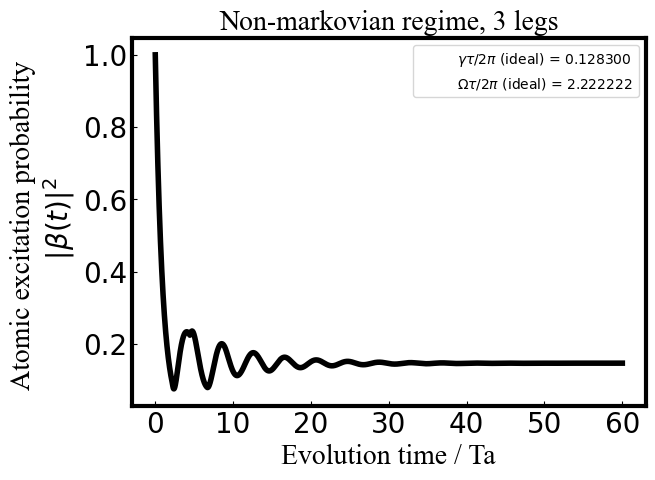

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import time
from matplotlib.pyplot import MultipleLocator

N = 3 ## The number of legs.
transition_frequency_of_atom = 1 ##Transition frequency of Atom (transmon), set to be unit  (\Omega in Eq.(7) of paper).
Ta = 2*np.pi/transition_frequency_of_atom  ##Transition period of transmon.

nk = 2
K = nk * N + 1  ##The mode of dark state . ~ n in Eq.(7) of paper.
dw = 0.05 ##Dark frequency deviation. dw = (\Omega_n-\Omega) / \Omega.  where \Omega_n is the dark state frequency. \Omega_n = 2n\pi / N\tau .
gamma = dw / abs(N * (1 / np.tan (K*pi/N)) / 2) ## ~ \gamma in Eq.(7) of paper.
T = 2 * np.pi * K / N / (transition_frequency_of_atom + N * gamma * (1/ np.tan (K * np.pi / N) ) / 2)  ## ~ \tau in Eq.(7) of paper.
tmax = 60*Ta

num_figure = 1   
Result = [0] * num_figure   
figure = 0    
while figure < num_figure:   
    start = time.time()    
    sigma_g = 0         
    sigma_x = 0
    gg_random = []                                        
    for i in range(N):
        a=np.random.normal(loc=0, scale=sigma_g, size=None)    
        gg_random.append(a)
    xx_random = []                                          
    for i in range(N):
        a=np.random.normal(loc=0, scale=sigma_x, size=None)
        xx_random.append(a)

    x_random = []                                      
    g_random = []                                       
    for j in range(N):                                   
        b =xx_random[j] + j         
        x_random.append(b)                             
        b =gg_random[j] + 1                             
        g_random.append(b)                              
        if g_random[j] < 0:                            
            break
    x_random[0] = 0                                  
    if g_random[j] < 0:                                
        continue
    print(x_random)                              
    print(g_random)                               

    steps = 500000
    dt = T/steps     
    beta_column = dbeta_column = math.ceil((tmax+x_random[-1]*T)/dt)+2 
    aa = math.ceil(x_random[-1]*T/dt)   
    beta = np.zeros(beta_column).astype(complex)   
    beta[aa] = 1
    dbeta = np.zeros(dbeta_column).astype(complex) 

    A = -transition_frequency_of_atom*1j
    B = -gamma/2
  
    dbeta[aa] = A*beta[aa]  
    m = 0
    while m < N:    
        mm = 0
        while mm < N:
            bb = math.ceil(-abs(x_random[m]-x_random[mm])*T/dt)
            dbeta[aa] = dbeta[aa] + B*g_random[m]*g_random[mm]*beta[bb+aa]
            mm = mm + 1
        m = m + 1

    i = 0
    while i < math.ceil(tmax/dt):
        beta[aa+i+1] = beta[aa+i] + dbeta[aa+i] * dt
        m = 0
        dbeta[aa+i+1] = A*beta[aa+i+1]
        while m < N:
            mm = 0
            while mm < N:
                bb = math.ceil(-abs(x_random[m]-x_random[mm])*T/dt)
                dbeta[aa+i+1] = dbeta[aa+i+1] + B*g_random[m]*g_random[mm]*beta[bb+aa+i+1]
                mm = mm + 1
            m = m + 1
        i = i + 1

    num = [0] * (math.ceil(tmax/dt))  
    data = [0] * (math.ceil(tmax/dt))   
    i = 0
    while i < math.ceil(tmax/dt):      
        num[i] = i * dt / Ta         
        data[i] = (beta[aa+i].real)**2+(beta[aa+i].imag)**2 
        i = i + 1

    fig, axs = plt.subplots(1, 1)   
    fig.tight_layout(rect=[0, 0, 1, 1], pad=3.0)
    axs.plot(num,data,color='black',linewidth=4)
    gammatau_2pi = gamma*T/2/pi
    omegatau_2pi = transition_frequency_of_atom*T/2/pi
    plt.plot(num,data, 'black', label='$\gamma$$\u03C4$/2$\pi$ (ideal) = %f'%gammatau_2pi,alpha=0)
    plt.plot(num,data, 'black', label='$\Omega$$\u03C4$/2$\pi$ (ideal) = %f'%omegatau_2pi,alpha=0)
    sizzzz = 20
    plt.title('Non-markovian regime, 3 legs',fontdict={'family' : 'Times New Roman', 'size':20})
    plt.xlabel("Evolution time / Ta",fontdict={'family' : 'Times New Roman', 'size':sizzzz})  #显示横坐标
    plt.ylabel("Atomic excitation probability \n"  r' $|\beta(t)|^2$',fontdict={'family' : 'Times New Roman', 'size':sizzzz})  #显示纵坐标   
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    ax.spines['top'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    plt.tick_params(labelsize = sizzzz,direction = 'in')
    figure = figure + 1   
    end = time.time()     
    print(figure,'RUNNING TIME:',(end-start))  
print("result is",Result)            
print("mean of result is",np.mean(Result))    
plt.legend() 
plt.show()

[0, 1.0126219332541644, 1.9744210598396432]
[0.9520449341149902, 0.9970272018660681, 0.9790327121564021]
1 RUNNING TIME: 241.14276099205017
result is [0]
mean of result is 0.0


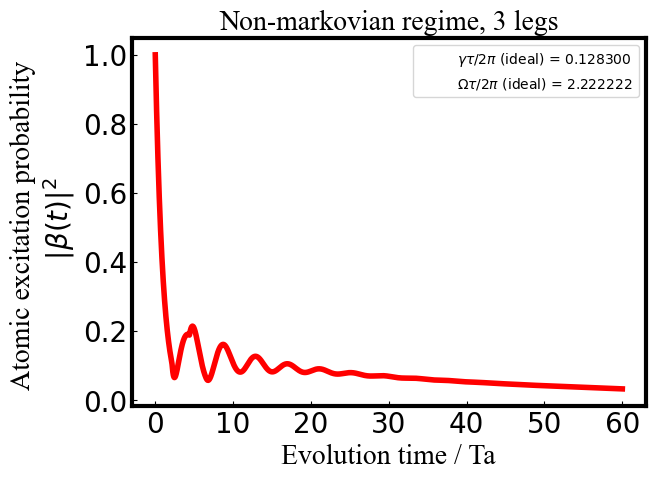

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import time
from matplotlib.pyplot import MultipleLocator

N = 3 ## The number of legs.
transition_frequency_of_atom = 1 ##Transition frequency of Atom (transmon), set to be unit  (\Omega in Eq.(7) of paper).
Ta = 2*np.pi/transition_frequency_of_atom  ##Transition period of transmon.

nk = 2
K = nk * N + 1  ##The mode of dark state . ~ n in Eq.(7) of paper.
dw = 0.05 ##Dark frequency deviation. dw = (\Omega_n-\Omega) / \Omega.  where \Omega_n is the dark state frequency. \Omega_n = 2n\pi / N\tau .
gamma = dw / abs(N * (1 / np.tan (K*pi/N)) / 2) ## ~ \gamma in Eq.(7) of paper.
T = 2 * np.pi * K / N / (transition_frequency_of_atom + N * gamma * (1/ np.tan (K * np.pi / N) ) / 2)  ## ~ \tau in Eq.(7) of paper.
tmax = 60*Ta

num_figure = 1   
Result = [0] * num_figure   
figure = 0    
while figure < num_figure:   
    start = time.time()    
    sigma_g = 0.05       
    sigma_x = 0.03
    gg_random = []                                        
    for i in range(N):
        a=np.random.normal(loc=0, scale=sigma_g, size=None)    
        gg_random.append(a)
    xx_random = []                                          
    for i in range(N):
        a=np.random.normal(loc=0, scale=sigma_x, size=None)
        xx_random.append(a)

    x_random = []                                      
    g_random = []                                       
    for j in range(N):                                   
        b =xx_random[j] + j         
        x_random.append(b)                             
        b =gg_random[j] + 1                             
        g_random.append(b)                              
        if g_random[j] < 0:                            
            break
    x_random[0] = 0                                  
    if g_random[j] < 0:                                
        continue
    print(x_random)                              
    print(g_random)                               

    steps = 500000
    dt = T/steps     
    beta_column = dbeta_column = math.ceil((tmax+x_random[-1]*T)/dt)+2 
    aa = math.ceil(x_random[-1]*T/dt)   
    beta = np.zeros(beta_column).astype(complex)   
    beta[aa] = 1
    dbeta = np.zeros(dbeta_column).astype(complex) 

    A = -transition_frequency_of_atom*1j
    B = -gamma/2
  
    dbeta[aa] = A*beta[aa]  
    m = 0
    while m < N:    
        mm = 0
        while mm < N:
            bb = math.ceil(-abs(x_random[m]-x_random[mm])*T/dt)
            dbeta[aa] = dbeta[aa] + B*g_random[m]*g_random[mm]*beta[bb+aa]
            mm = mm + 1
        m = m + 1

    i = 0
    while i < math.ceil(tmax/dt):
        beta[aa+i+1] = beta[aa+i] + dbeta[aa+i] * dt
        m = 0
        dbeta[aa+i+1] = A*beta[aa+i+1]
        while m < N:
            mm = 0
            while mm < N:
                bb = math.ceil(-abs(x_random[m]-x_random[mm])*T/dt)
                dbeta[aa+i+1] = dbeta[aa+i+1] + B*g_random[m]*g_random[mm]*beta[bb+aa+i+1]
                mm = mm + 1
            m = m + 1
        i = i + 1

    num = [0] * (math.ceil(tmax/dt))  
    data = [0] * (math.ceil(tmax/dt))   
    i = 0
    while i < math.ceil(tmax/dt):      
        num[i] = i * dt / Ta         
        data[i] = (beta[aa+i].real)**2+(beta[aa+i].imag)**2 
        i = i + 1

    fig, axs = plt.subplots(1, 1)   
    fig.tight_layout(rect=[0, 0, 1, 1], pad=3.0)
    axs.plot(num,data,color='r',linewidth=4)
    gammatau_2pi = gamma*T/2/pi
    omegatau_2pi = transition_frequency_of_atom*T/2/pi
    plt.plot(num,data, 'r', label='$\gamma$$\u03C4$/2$\pi$ (ideal) = %f'%gammatau_2pi,alpha=0)
    plt.plot(num,data, 'r', label='$\Omega$$\u03C4$/2$\pi$ (ideal) = %f'%omegatau_2pi,alpha=0)
    sizzzz = 20
    plt.title('Non-markovian regime, 3 legs',fontdict={'family' : 'Times New Roman', 'size':20})
    plt.xlabel("Evolution time / Ta",fontdict={'family' : 'Times New Roman', 'size':sizzzz})  #显示横坐标
    plt.ylabel("Atomic excitation probability \n"  r' $|\beta(t)|^2$',fontdict={'family' : 'Times New Roman', 'size':sizzzz})  #显示纵坐标   
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    ax.spines['top'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    plt.tick_params(labelsize = sizzzz,direction = 'in')
    figure = figure + 1   
    end = time.time()     
    print(figure,'RUNNING TIME:',(end-start))  
print("result is",Result)            
print("mean of result is",np.mean(Result))    
plt.legend() 
plt.show()

Code for Figure.4(a1) of paper

In [ ]:
import math
import numpy as np
from numpy import *
import time

N = 3 ## The number of legs.
transition_frequency_of_atom = 1 ##Transition frequency of Atom (transmon), set to be unit  (\Omega in Eq.(7) of paper).
Ta = 2*np.pi/transition_frequency_of_atom  ##Transition period of transmon.

nk = 0
K = nk * N + 1  ##The mode of dark state . ~ n in Eq.(7) of paper.
tmax = 2.6*Ta
gamma_tau = 0.001
T = 2 * pi * K / N / transition_frequency_of_atom -1/2*N*gamma_tau*(1/tan(K*pi/N))/transition_frequency_of_atom
gamma = gamma_tau/T

list_sigma_g = [0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4]
index_sigma_g = 0
while index_sigma_g < len(list_sigma_g):
    num_figure = 200
    Result = [0] * num_figure
    figure = 0
    sigma_g = list_sigma_g[index_sigma_g]
    sigma_x = 0
    f = 'markov N3 ' + 'g' +str(list_sigma_g[index_sigma_g]) + ' t' + str(sigma_x) + '.txt'
    while figure < num_figure:
        start = time.time()
        gg_random = []                                          
        for i in range(N):
            a=np.random.normal(loc=0, scale=sigma_g, size=None)    
            gg_random.append(a)
        xx_random = []                                          
        for i in range(N):
            a=np.random.normal(loc=0, scale=sigma_x, size=None)
            xx_random.append(a)
        x_random = []                                       
        g_random = []                                     
        for j in range(N):                                  
            b =xx_random[j] + j         
            x_random.append(b)                             
            b =gg_random[j] + 1
            g_random.append(b)                            
            x_random[0] = 0                                  
            if g_random[j] < 0:                          
                break
            if x_random[j] < 0:
                break
        if x_random[j] < 0:
            continue
        if g_random[j] < 0:
            continue
        if x_random[0] > x_random[1]:
            continue
        if x_random[1] > x_random[2]:
            continue
        print(x_random)                             
        print(g_random)                               
        steps = 500000
        dt = T/steps    
        beta_column = dbeta_column = math.ceil((tmax+x_random[-1]*T)/dt)+2 
        aa = math.ceil(x_random[-1]*T/dt)
        beta = np.zeros(beta_column).astype(complex)   
        beta[aa] = 1
        dbeta = np.zeros(dbeta_column).astype(complex) 

        A = -transition_frequency_of_atom*1j
        B = -gamma/2

        dbeta[aa] = A*beta[aa]  
        m = 0
        while m < N:
            mm = 0
            while mm < N:
                bb = math.ceil(-abs(x_random[m]-x_random[mm])*T/dt)
                dbeta[aa] = dbeta[aa] + B*g_random[m]*g_random[mm]*beta[bb+aa]
                mm = mm + 1
            m = m + 1

        i = 0
        while i < math.ceil(tmax/dt):
            beta[aa+i+1] = beta[aa+i] + dbeta[aa+i] * dt
            m = 0
            dbeta[aa+i+1] = A*beta[aa+i+1]
            while m < N:
                mm = 0
                while mm < N:
                    # bb = -abs(t_random[m]-t_random[mm])*T/dt
                    bb = math.ceil(-abs(x_random[m]-x_random[mm])*T/dt)
                    dbeta[aa+i+1] = dbeta[aa+i+1] + B*g_random[m]*g_random[mm]*beta[bb+aa+i+1]
                    mm = mm + 1
                m = m + 1
            i = i + 1

        data = [0] * (math.ceil(tmax/dt))
        i = 0
        while i < math.ceil(tmax/dt):
            data[i] = (beta[aa+i].real)**2+(beta[aa+i].imag)**2
            i = i + 1
        Result[figure] = np.log(data[math.ceil(2.5*Ta/dt)] / data[math.ceil(2*Ta/dt)]) * (-1) / 2 / (0.5*Ta)
        print(np.log(data[math.ceil(2.5*Ta/dt)] / data[math.ceil(2*Ta/dt)]) * (-1) / 2 / (0.5*Ta))
        if figure == 0:
            print(T/dt)
        with open(f,"a") as file:
            file.write(str(Result[figure]) + "\n")
        figure = figure + 1
        end = time.time()
        print(figure,'RUNNING TIME:',(end-start))
    print("data is:",Result)
    print("mean of result is:",np.mean(Result),"\n")
    with open(f,"a") as file:
        file.write("markov N: "+str(N)+" t: "+str(sigma_x) +" " +"g: " + str(sigma_g) + " pingjunzhi: " + str(np.mean(Result)) + "\n")
    ff = "markov N3 total.txt"
    with open(ff,"a") as file:
        file.write("markov N: "+str(N)+" t: "+str(sigma_x) +" " +"g: " + str(sigma_g) + " pingjunzhi: " + str(np.mean(Result)) + "\n")

    index_sigma_g = index_sigma_g + 1

C:\Users\23109\AppData\Local\Temp\ipykernel_1980\2965999861.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_xticklabels([0.00, 0, 0.1, 0.2, 0.3])
C:\Users\23109\AppData\Local\Temp\ipykernel_1980\2965999861.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_yticklabels([0.00, 0, 0.1, 0.2, 0.3])


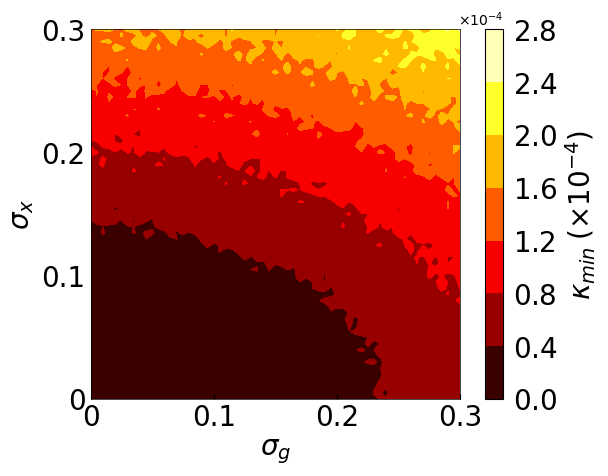

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from matplotlib.pyplot import MultipleLocator
from matplotlib.pyplot import FormatStrFormatter

file_path = 'Markovian_N3_total.CSV'  
df = pd.read_csv(file_path)
df_sorted = df.sort_values(by=['t', 'g'])  # t represents position(distance); g represents strength
df_filtered = df_sorted[(df_sorted['t'] <= 0.3) & (df_sorted['g'] <= 0.3)]  
result_dict = {}  
for index, row in df_filtered.iterrows():  
    key = row['t']
    value = row['col_value']
    if key not in result_dict:
        result_dict[key] = []
    result_dict[key].append(value)
result_lists = list(result_dict.values()) 
seen_first_column = set() 
seen_second_column = set()
first_column_values = []
second_column_values = []   
for index, row in df_filtered.iterrows(): 
    first_col_val = row['t']
    second_col_val = row['g']
    if first_col_val not in seen_first_column:
        first_column_values.append(first_col_val)
        seen_first_column.add(first_col_val)
    if second_col_val not in seen_second_column:
        second_column_values.append(second_col_val)
        seen_second_column.add(second_col_val)

X,Y = np.meshgrid(second_column_values,first_column_values)
Z = np.array(result_lists)

sizesize = 20
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.contourf(X,Y,Z)
cset = plt.contourf(X,Y,Z,7,cmap=plt.cm.hot)
contour = plt.contour(X,Y,Z,7, alpha = 0,linestyles='--')
plt.clabel(contour,fontsize=10,colors='b')

cbar = plt.colorbar()


tick_locator = ticker.MaxNLocator(nbins=10) 
cbar.locator = tick_locator
cbar.update_ticks()

colorbar = fig.colorbar(cset)
colorbar.ax.tick_params(labelsize=sizesize,which='both', bottom=True, top=False,left=False, right=False)
colorbar.set_label(r'$\kappa_{min}\thickspace (\times 10^{-4})$',fontdict={'family' : 'Times New Roman', 'size':sizesize})
ax.set_xlabel('$\sigma_g$',fontdict={'family' : 'Times New Roman', 'size':sizesize})
plt.tick_params(labelsize = sizesize,direction = 'in')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylabel('$\sigma_x$',fontdict={'family' : 'Times New Roman', 'size':sizesize})
ticks = ax.set_xticklabels([0.00, 0, 0.1, 0.2, 0.3])
ticks = ax.set_yticklabels([0.00, 0, 0.1, 0.2, 0.3])
ax.spines['top'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
colorbar.formatter = ticker.ScalarFormatter(useMathText=True)
colorbar.formatter.set_powerlimits((0, 0))
colorbar.update_ticks()
ax.tick_params(axis='x', which='both', bottom=True, top=False)
ax.tick_params(axis='y', which='both', left=False, right=False)

plt.show()

Code for Figure.4(a2) of paper

Markovian_N3_total.CSV
Fitted coefficient for x^2: 0.0006955818365190513


C:\Users\23109\AppData\Local\Temp\ipykernel_1980\1464841455.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_xticklabels([0.00,0, 0.1, 0.2,0.3])
C:\Users\23109\AppData\Local\Temp\ipykernel_1980\1464841455.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_yticklabels([0.00, 0, 0.00006, 0.00012, 0.00018])


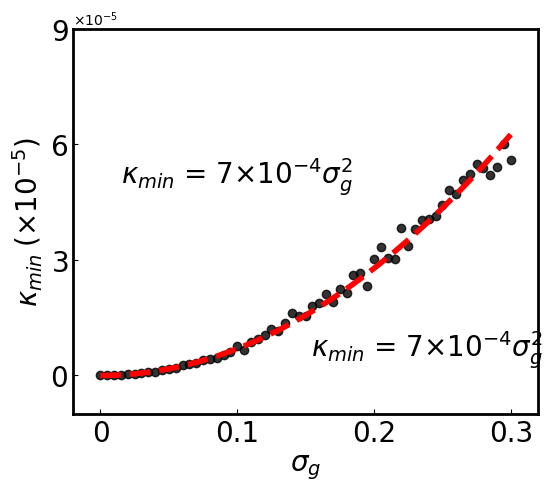

ln$\kappa_{min}$ = 2.01ln$\sigma_{g}$ -7.24


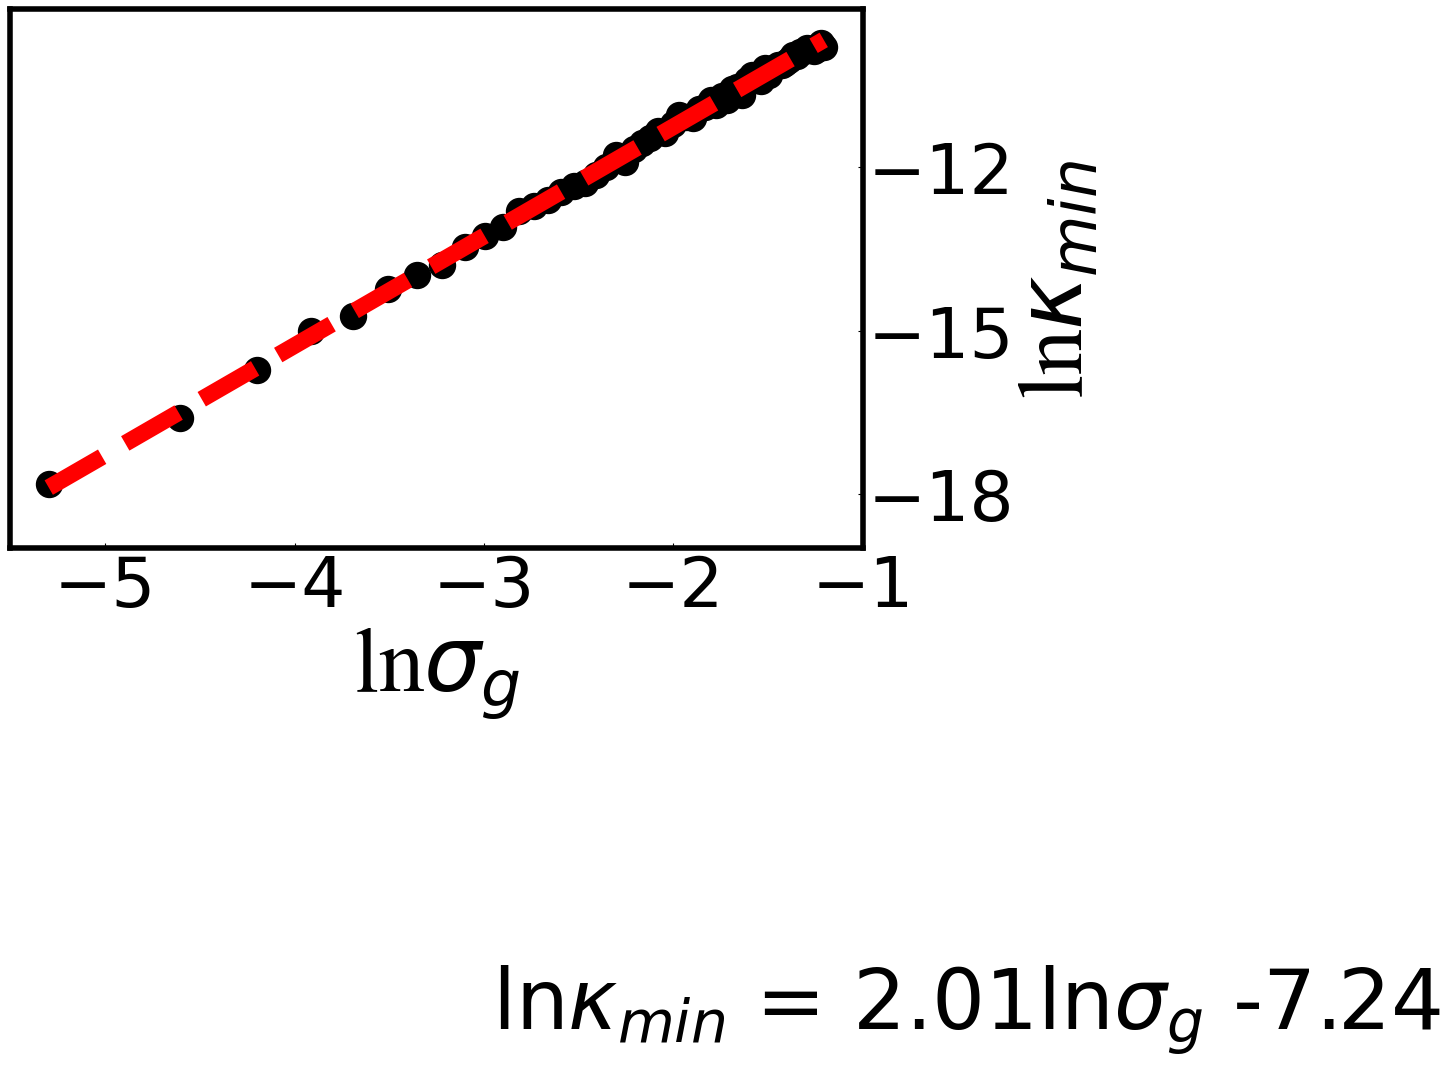

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.pyplot import MultipleLocator
from matplotlib.pyplot import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter


legs = 3
m_or_nm = 1  # 1 for Markov, 2 for Non-Markov


equal_0 = 't'   # Define the series names here to avoid hardcoding in multiple places
change = 'g'

sizesizesize = 20
file_path = ''  # Determine the file path based on user inputs
if legs == 3:
    file_path = 'Markovian_N3_total.CSV' if m_or_nm == 1 else 'non_Markovian_N3_total.CSV'
elif legs == 4:
    file_path = 'Braided_total.CSV'

dataframe = pd.read_csv(file_path)
print(file_path)

filtered_df = dataframe.loc[(dataframe[equal_0] == 0) & (dataframe[change] <= 0.3)]
sorted_df = filtered_df.sort_values(by=change)
c_values = sorted_df['col_value'].tolist()
column_change_sorted_values = sorted_df[change].tolist()

A = np.vander(column_change_sorted_values, 3)[:, :1]  
a, _, _, _ = np.linalg.lstsq(A, c_values, rcond=None)  
print(f"Fitted coefficient for x^2: {a[0]}") 
x_fit = np.linspace(min(column_change_sorted_values), max(column_change_sorted_values), 100)
y_fit = a[0] * x_fit**2
plt.figure(figsize=(6,5))
plt.scatter(column_change_sorted_values, c_values,  alpha=0.8,color='black')
plt.plot(x_fit, y_fit,  color='red',linewidth = 4, linestyle='--')

index_of_total = file_path.find('total')
result = file_path[:index_of_total].strip() 


if equal_0 == 't':
    plt.ylim((-0.00001, 0.00009))
    plt.xlim((-0.02, 0.32))
    plt.xlabel('$\sigma_g$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize})
    plt.tick_params(labelsize = sizesizesize,direction = 'in')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(0.1))
    ax.yaxis.set_major_locator(MultipleLocator(0.00003))
    ticks = ax.set_xticklabels([0.00,0, 0.1, 0.2,0.3])
    ticks = ax.set_yticklabels([0.00, 0, 0.00006, 0.00012, 0.00018])
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))
    ax.yaxis.set_major_formatter(formatter)
    function_label = r'$\kappa_{{min}}$ = 7$\times 10^{-4}\sigma^2_{{g}}$'
    plt.text(0.239, 0.000005, function_label, fontsize=sizesizesize, ha='center') 
    plt.text(0.1, 0.00005, function_label, fontsize=sizesizesize, ha='center')  
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)

if legs == 4:
    plt.ylabel('$\kappa_{braided}$',fontdict={'family' : 'Times New Roman', 'size':16})
else:
    plt.ylabel(r'$\kappa_{min}\thickspace (\times 10^{-5})$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize})

plt.show()

column_change_sorted_values = column_change_sorted_values[1:]
c_values = c_values[1:]
x = np.log(column_change_sorted_values)
y = np.log(c_values)
sizesizesize_2 = 50
if legs == 3 and m_or_nm == 2 and equal_0 == 't':
    x = x[-70:]
    y = y[-70:]
if legs == 4 or m_or_nm == 1 or change == 'g':
    coefficients = np.polyfit(x, y, 1) 
    a, b = coefficients  
    y_fit = a * x + b  
    plt.figure(figsize=(11,7))
    plt.scatter(x, y,s = 350,color='black', alpha=1,label='Data Points')  
    plt.plot(x, y_fit, color='red', linewidth = 12, linestyle="--",label=f'Fit Line')  
    yticks = plt.gca().get_yticks()  
    if len(yticks) > 1: 
        tick_diff = yticks[1] - yticks[0]
    else:
        tick_diff = 0  

    plt.ylabel('ln$\kappa_{min}$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize_2*1.3})    
    if equal_0 == 't':
        plt.xlabel('ln$\sigma_{{g}}$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize_2*1.3})
        equation = f'ln$\kappa_{{min}}$ = {a:.2f}ln$\sigma_{{g}}$ {b:.2f}' 
        print(equation)
        plt.tick_params(labelsize = sizesizesize_2,direction = 'in')
        ax = plt.gca()
        plt.ylim(-19,-9.1)
        ax.yaxis.set_major_locator(MultipleLocator(3))
        ax.xaxis.set_major_locator(MultipleLocator(1))
        plt.text((np.min(x) + np.max(x)) / 2.2, min(y)-10, equation, fontsize=sizesizesize_2*1.2, color='black')
        ax.spines['top'].set_linewidth(4)
        ax.spines['bottom'].set_linewidth(4)
        ax.spines['right'].set_linewidth(4)
        ax.spines['left'].set_linewidth(4)
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
plt.show()


Code for Figure.4(a3) of paper

Markovian_N3_total.CSV
Fitted coefficient for x^2: 0.001903271083032246


C:\Users\23109\AppData\Local\Temp\ipykernel_1980\2862974069.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_xticklabels([0.00,0, 0.1, 0.2,0.3])
C:\Users\23109\AppData\Local\Temp\ipykernel_1980\2862974069.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_yticklabels([0.00, 0, 0.00006, 0.00012, 0.00018])


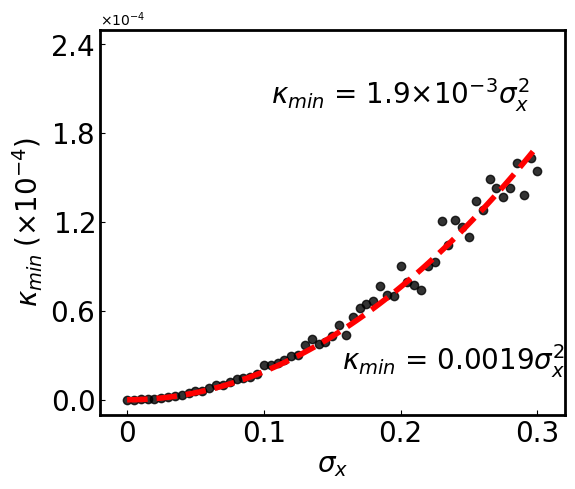

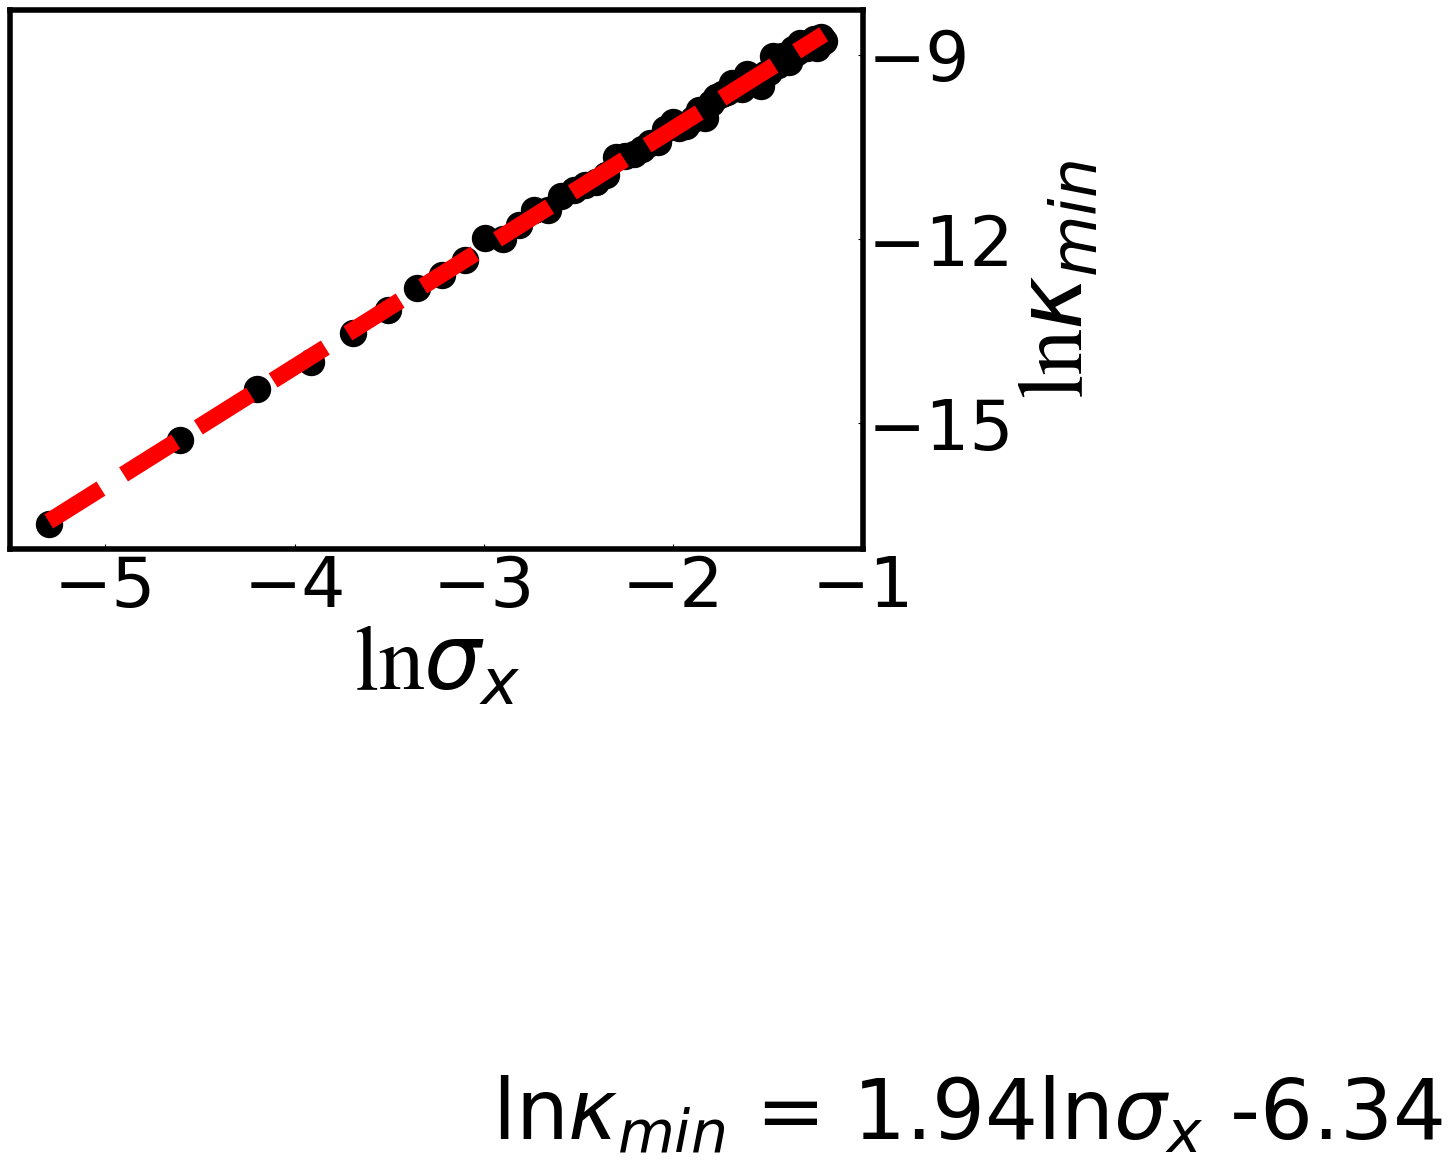

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.pyplot import MultipleLocator
from matplotlib.pyplot import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter

legs = 3
m_or_nm = 1  # 1 for Markov, 2 for Non-Markov

equal_0 = 'g'
change = 't'

sizesizesize = 20
file_path = '' 
if legs == 3:
    file_path = 'Markovian_N3_total.CSV' if m_or_nm == 1 else 'non_Markovian_N3_total.CSV'
elif legs == 4:
    file_path = 'Braided_total.CSV'

dataframe = pd.read_csv(file_path)
print(file_path)

filtered_df = dataframe.loc[(dataframe[equal_0] == 0) & (dataframe[change] <= 0.3)]
sorted_df = filtered_df.sort_values(by=change)
c_values = sorted_df['col_value'].tolist()
column_change_sorted_values = sorted_df[change].tolist()

A = np.vander(column_change_sorted_values, 3)[:, :1]  
a, _, _, _ = np.linalg.lstsq(A, c_values, rcond=None)  
print(f"Fitted coefficient for x^2: {a[0]}") 
x_fit = np.linspace(min(column_change_sorted_values), max(column_change_sorted_values), 100)
y_fit = a[0] * x_fit**2
plt.figure(figsize=(6,5))
plt.scatter(column_change_sorted_values, c_values,  alpha=0.8,color='black')
plt.plot(x_fit, y_fit,  color='red',linewidth = 4, linestyle='--')
    

index_of_total = file_path.find('total')
result = file_path[:index_of_total].strip() 

if equal_0 == 'g':
    plt.ylim((-0.00001, 0.00025))
    plt.xlim((-0.02, 0.32))
    plt.xlabel('$\sigma_x$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize})
    plt.tick_params(labelsize = sizesizesize,direction = 'in')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(0.1))
    ax.yaxis.set_major_locator(MultipleLocator(0.00006))
    ticks = ax.set_xticklabels([0.00,0, 0.1, 0.2,0.3])
    ticks = ax.set_yticklabels([0.00, 0, 0.00006, 0.00012, 0.00018])
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))
    ax.yaxis.set_major_formatter(formatter)
    function_label = f'$\kappa_{{min}}$ = {a[0]:.4f}$\sigma^2_{{x}}$'
    function_label_2 = r'$\kappa_{{min}}$ = 1.9$\times 10^{-3}\sigma^2_{{x}}$'
    plt.text(0.239, 0.00002, function_label, fontsize=sizesizesize, ha='center') 
    plt.text(0.2, 0.0002, function_label_2, fontsize=sizesizesize, ha='center')  
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)

if legs == 4:
    plt.ylabel('$\kappa_{braided}$',fontdict={'family' : 'Times New Roman', 'size':16})
else:
    plt.ylabel(r'$\kappa_{min}\thickspace (\times 10^{-4})$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize})

plt.show()

column_change_sorted_values = column_change_sorted_values[1:]
c_values = c_values[1:]
x = np.log(column_change_sorted_values)
y = np.log(c_values)
sizesizesize_2 = 50
if legs == 3 and m_or_nm == 2 and equal_0 == 't':
    x = x[-70:]
    y = y[-70:]
if legs == 4 or m_or_nm == 1 or change == 'g':
    coefficients = np.polyfit(x, y, 1) 
    a, b = coefficients 
    y_fit = a * x + b 
    plt.figure(figsize=(11,7))
    plt.scatter(x, y,s = 350,color='black', alpha=1,label='Data Points')  
    plt.plot(x, y_fit, color='red', linewidth = 12, linestyle="--",label=f'Fit Line')  

    
    yticks = plt.gca().get_yticks() 
    if len(yticks) > 1:  
        tick_diff = yticks[1] - yticks[0]
    else:
        tick_diff = 0  
    
    plt.ylabel('ln$\kappa_{min}$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize_2*1.3})    
    if equal_0 == 'g':
        plt.xlabel('ln$\sigma_{{x}}$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize_2*1.3})
        equation = f'ln$\kappa_{{min}}$ = {a:.2f}ln$\sigma_{{x}}$ {b:.2f}' 
        plt.tick_params(labelsize = sizesizesize_2,direction = 'in')
        ax = plt.gca()
        ax.yaxis.set_major_locator(MultipleLocator(3))
        ax.xaxis.set_major_locator(MultipleLocator(1))
        plt.text((np.min(x) + np.max(x)) / 2.2, min(y)-10, equation, fontsize=sizesizesize_2*1.2, color='black')
        ax.spines['top'].set_linewidth(4)
        ax.spines['bottom'].set_linewidth(4)
        ax.spines['right'].set_linewidth(4)
        ax.spines['left'].set_linewidth(4)
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
plt.show() 

Code for Figure.4(b1) of paper

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import time

N = 3
transition_frequency_of_atom = 1
Ta = 2*np.pi/transition_frequency_of_atom
nk = 2
K = nk * N + 1
dw = 0.05
gamma = dw / abs(N * (1 / np.tan (K*pi/N)) / 2)
T = 2 * np.pi * K / N / (transition_frequency_of_atom + N * gamma * (1/ np.tan (K * np.pi / N) ) / 2)
tmax = 56 * Ta

list_sigma_g = [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024, 0.028, 0.032, 0.036, 0.04, 0.044, 0.048, 0.052, 0.056, 0.06, 0.064, 0.068, 0.072, 0.076, 0.08, 0.084, 0.088, 0.092, 0.096, 0.1, 0.104, 0.108, 0.112, 0.116, 0.12, 0.124, 0.128, 0.132, 0.136, 0.14, 0.144, 0.148, 0.152, 0.156, 0.16, 0.164, 0.168, 0.172, 0.176, 0.18, 0.184, 0.188, 0.192, 0.196, 0.2, 0.204, 0.208, 0.212, 0.216, 0.22, 0.224, 0.228, 0.232, 0.236, 0.24, 0.244, 0.248, 0.252, 0.256, 0.26, 0.264, 0.268, 0.272, 0.276, 0.28, 0.284, 0.288, 0.292, 0.296, 0.3, 0.304, 0.308, 0.312, 0.316, 0.32, 0.324, 0.328, 0.332, 0.336, 0.34, 0.344, 0.348, 0.352, 0.356, 0.36, 0.364, 0.368, 0.372, 0.376, 0.38, 0.384, 0.388, 0.392, 0.396, 0.4]

index_sigma_g = 0
while index_sigma_g < len(list_sigma_g):
    num_figure = 100
    Result = [0] * num_figure
    figure = 0
    sigma_g = list_sigma_g[index_sigma_g]
    sigma_x = 0.3
    f = 'non-markov N3 ' + 'g' +str(list_sigma_g[index_sigma_g]) + ' t' + str(sigma_x) + '.txt'
    while figure < num_figure:
        start = time.time()
        gg_random = []                                         
        for i in range(N):
            a=np.random.normal(loc=0, scale=sigma_g, size=None)    
            gg_random.append(a)
        xx_random = []                                          
        for i in range(N):
            a=np.random.normal(loc=0, scale=sigma_x, size=None)
            xx_random.append(a)
        x_random = []                                      
        g_random = []                                       
        for j in range(N):                                  
            b =xx_random[j] + j        
            x_random.append(b)                             
            b =gg_random[j] + 1
            g_random.append(b)                            
            x_random[0] = 0                               
            if g_random[j] < 0:                              
                break
            if x_random[j] < 0:
                break
        if x_random[j] < 0:
            continue
        if g_random[j] < 0:
            continue
        if x_random[0] > x_random[1]:
            continue
        if x_random[1] > x_random[2]:
            continue
        print(x_random)                              
        print(g_random)                              
        steps = 500000
        dt = T/steps    
        beta_column = dbeta_column = math.ceil((tmax+x_random[-1]*T)/dt)+2
        aa = math.ceil(x_random[-1]*T/dt)
        beta = np.zeros(beta_column).astype(complex)   
        beta[aa] = 1
        dbeta = np.zeros(dbeta_column).astype(complex) 
       
        A = -transition_frequency_of_atom*1j
        B = -gamma/2
       
        dbeta[aa] = A*beta[aa]  
        m = 0
        while m < N:
            mm = 0
            while mm < N:
                bb = math.ceil(-abs(x_random[m]-x_random[mm])*T/dt)
                dbeta[aa] = dbeta[aa] + B*g_random[m]*g_random[mm]*beta[bb+aa]
                mm = mm + 1
            m = m + 1

        i = 0
        while i < math.ceil(tmax/dt):
            beta[aa+i+1] = beta[aa+i] + dbeta[aa+i] * dt
            m = 0
            dbeta[aa+i+1] = A*beta[aa+i+1]
            while m < N:
                mm = 0
                while mm < N:
                    bb = math.ceil(-abs(x_random[m]-x_random[mm])*T/dt)
                    dbeta[aa+i+1] = dbeta[aa+i+1] + B*g_random[m]*g_random[mm]*beta[bb+aa+i+1]
                    mm = mm + 1
                m = m + 1
            i = i + 1

        data = [0] * (math.ceil(tmax/dt))
        i = 0
        while i < math.ceil(tmax/dt):
            data[i] = (beta[aa+i].real)**2+(beta[aa+i].imag)**2
            i = i + 1
        Result[figure] = np.log(data[math.ceil(55*Ta/dt)] / data[math.ceil(50*Ta/dt)]) * (-1) / 2 / (5*Ta)
        print(np.log(data[math.ceil(55*Ta/dt)] / data[math.ceil(50*Ta/dt)]) * (-1) / 2 / (5*Ta))
        if figure == 0:
            print(T/dt)
        figure = figure + 1
        end = time.time()
        print(figure,'RUNNING TIME:',(end-start))
    print("data is:",Result)
    print("mean of result is:",np.mean(Result),"\n")
    with open(f,"a") as file:
        file.write("non-markov N: "+str(N)+" t: "+str(sigma_x) +" " +"g: " + str(sigma_g) + " pingjunzhi: " + str(np.mean(Result)) + "\n")
    ff = "non-markov N3 total.txt"
    with open(ff,"a") as file:
        file.write("non-markov N: "+str(N)+" t: "+str(sigma_x) +" " +"g: " + str(sigma_g) + " pingjunzhi: " + str(np.mean(Result)) + "\n")

    index_sigma_g = index_sigma_g + 1

C:\Users\23109\AppData\Local\Temp\ipykernel_9424\2494058294.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_xticklabels([0.00, 0, 0.1, 0.2, 0.3])
C:\Users\23109\AppData\Local\Temp\ipykernel_9424\2494058294.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_yticklabels([0.00, 0, 0.1, 0.2, 0.3])


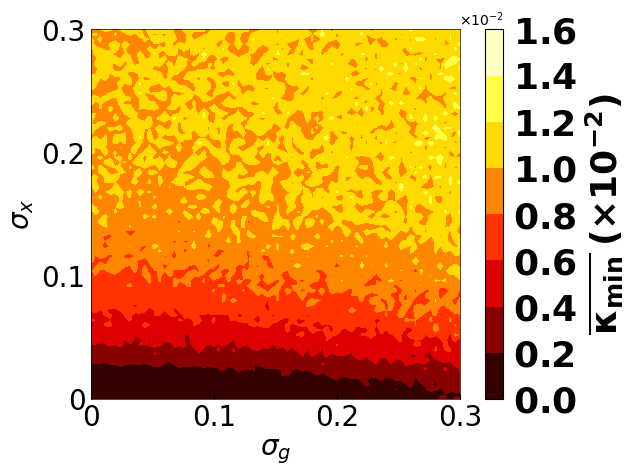

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from matplotlib.pyplot import MultipleLocator
from matplotlib.pyplot import FormatStrFormatter


file_path = 'non_Markovian_N3_total.CSV'  
df = pd.read_csv(file_path)
df_sorted = df.sort_values(by=['t', 'g']) 
df_filtered = df_sorted[(df_sorted['t'] <= 0.3) & (df_sorted['g'] <= 0.3)]  
result_dict = {}  
for index, row in df_filtered.iterrows():   
    key = row['t']
    value = row['col_value']
    if key not in result_dict:
        result_dict[key] = []
    result_dict[key].append(value)
result_lists = list(result_dict.values()) 
seen_first_column = set()  
seen_second_column = set()
first_column_values = []
second_column_values = []   
for index, row in df_filtered.iterrows(): 
    first_col_val = row['t']
    second_col_val = row['g']
    if first_col_val not in seen_first_column:
        first_column_values.append(first_col_val)
        seen_first_column.add(first_col_val)
    if second_col_val not in seen_second_column:
        second_column_values.append(second_col_val)
        seen_second_column.add(second_col_val)

X,Y = np.meshgrid(second_column_values,first_column_values)
Z = np.array(result_lists)

sizesize = 20
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.contourf(X,Y,Z)
cset = plt.contourf(X,Y,Z,7,cmap=plt.cm.hot) 
contour = plt.contour(X,Y,Z,7, alpha = 0,linestyles='--')
plt.clabel(contour,fontsize=10,colors='b')

cbar = plt.colorbar() 

tick_locator = ticker.MaxNLocator(nbins=10)  
cbar.locator = tick_locator
cbar.update_ticks()
colorbar = fig.colorbar(cset)
colorbar.ax.tick_params(labelsize=sizesize*1.3,which='both', bottom=True, top=False,left=False, right=False)

for text in colorbar.ax.get_yticklabels():
    text.set_weight('black')
colorbar.set_label(r'$\bf{\overline{\kappa_{min}}\thickspace (\times 10^{-2})}$',fontdict={'family' : 'Times New Roman', 'size':sizesize*1.3})
ax.set_xlabel('$\sigma_g$',fontdict={'family' : 'Times New Roman', 'size':sizesize})
plt.tick_params(labelsize = sizesize,direction = 'in')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylabel('$\sigma_x$',fontdict={'family' : 'Times New Roman', 'size':sizesize})
ticks = ax.set_xticklabels([0.00, 0, 0.1, 0.2, 0.3])
ticks = ax.set_yticklabels([0.00, 0, 0.1, 0.2, 0.3])
ax.spines['top'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
colorbar.formatter = ticker.ScalarFormatter(useMathText=True)
colorbar.formatter.set_powerlimits((0, 0))
colorbar.update_ticks()
ax.tick_params(axis='x', which='both', bottom=True, top=False)
ax.tick_params(axis='y', which='both', left=False, right=False)
plt.show()

Code for Figure.4(b2) of paper

non_Markovian_N3_total.CSV
Fitted coefficient for x^2: 0.02282108134387632


C:\Users\23109\AppData\Local\Temp\ipykernel_1980\3836455326.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_xticklabels([0.00,0, 0.1, 0.2,0.3])
C:\Users\23109\AppData\Local\Temp\ipykernel_1980\3836455326.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_yticklabels([0.00, 0, 0.00006, 0.00012, 0.00018])


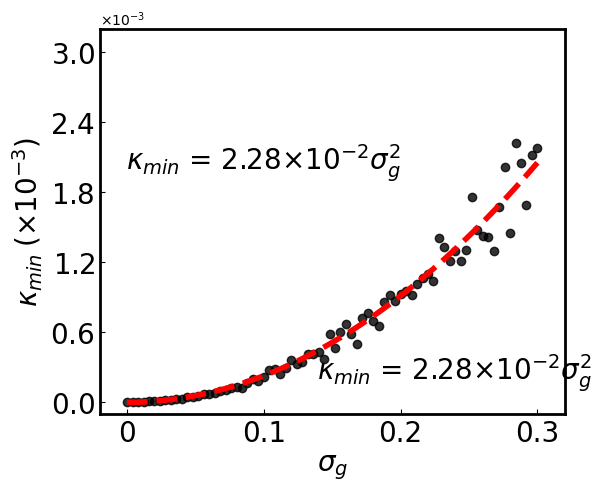

ln$\kappa_{min}$ = 2.04ln$\sigma_{g}$ -3.73


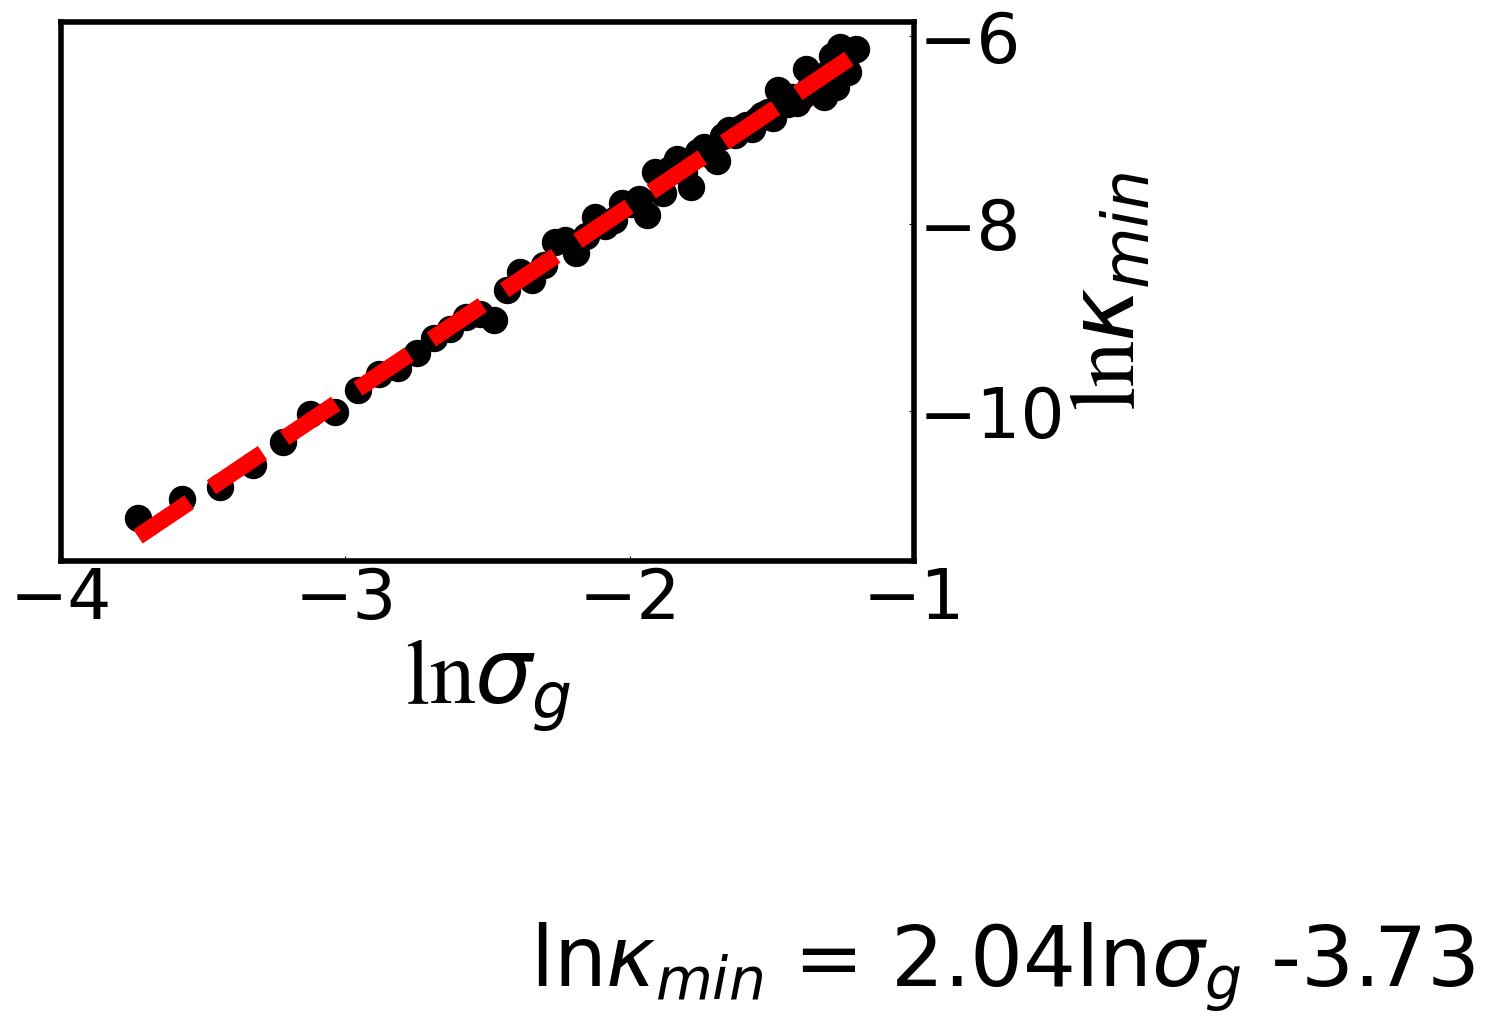

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.pyplot import MultipleLocator
from matplotlib.pyplot import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter

legs = 3
m_or_nm = 2  # 1 for Markov, 2 for Non-Markov

equal_0 = 't'   
change = 'g'

sizesizesize = 20
file_path = ''  
if legs == 3:
    file_path = 'Markovian_N3_total.CSV' if m_or_nm == 1 else 'non_Markovian_N3_total.CSV'
elif legs == 4:
    file_path = 'Braided_total.CSV'

dataframe = pd.read_csv(file_path)
print(file_path)

filtered_df = dataframe.loc[(dataframe[equal_0] == 0) & (dataframe[change] <= 0.3)]
sorted_df = filtered_df.sort_values(by=change)
c_values = sorted_df['col_value'].tolist()
column_change_sorted_values = sorted_df[change].tolist()

A = np.vander(column_change_sorted_values, 3)[:, :1]
a, _, _, _ = np.linalg.lstsq(A, c_values, rcond=None)  
print(f"Fitted coefficient for x^2: {a[0]}") 
x_fit = np.linspace(min(column_change_sorted_values), max(column_change_sorted_values), 100)
y_fit = a[0] * x_fit**2
plt.figure(figsize=(6,5))
plt.scatter(column_change_sorted_values, c_values,  alpha=0.8,color='black')
plt.plot(x_fit, y_fit,  color='red',linewidth = 4, linestyle='--')
    
index_of_total = file_path.find('total')
result = file_path[:index_of_total].strip()  

if equal_0 == 't':
    plt.ylim((-0.0001, 0.0032))
    plt.xlim((-0.02, 0.32))
    plt.xlabel('$\sigma_g$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize})
    plt.tick_params(labelsize = sizesizesize,direction = 'in')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(0.1))
    ax.yaxis.set_major_locator(MultipleLocator(0.0006))
    ticks = ax.set_xticklabels([0.00,0, 0.1, 0.2,0.3])
    ticks = ax.set_yticklabels([0.00, 0, 0.00006, 0.00012, 0.00018])
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))
    ax.yaxis.set_major_formatter(formatter)
    function_label = r'$\kappa_{{min}}$ = 2.28$\times 10^{-2}\sigma^2_{{g}}$'
    plt.text(0.239, 0.0002, function_label, fontsize=sizesizesize, ha='center')  
    plt.text(0.1, 0.002, function_label, fontsize=sizesizesize, ha='center') 
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)

if legs == 4:
    plt.ylabel('$\kappa_{braided}$',fontdict={'family' : 'Times New Roman', 'size':16})
else:
    plt.ylabel(r'$\kappa_{min}\thickspace (\times 10^{-3})$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize})

plt.show()

column_change_sorted_values = column_change_sorted_values[1:]
c_values = c_values[1:]
x = np.log(column_change_sorted_values)
y = np.log(c_values)
sizesizesize_2 = 50
if legs == 3 and m_or_nm == 2 and equal_0 == 't':
    x = x[-70:]
    y = y[-70:]
if legs == 4 or m_or_nm == 1 or change == 'g':
    coefficients = np.polyfit(x, y, 1)  
    a, b = coefficients 
    y_fit = a * x + b 
    plt.figure(figsize=(11,7))
    plt.scatter(x, y,s = 350,color='black', alpha=1,label='Data Points') 
    plt.plot(x, y_fit, color='red', linewidth = 12, linestyle="--",label=f'Fit Line')  
    yticks = plt.gca().get_yticks()  
    if len(yticks) > 1:  
        tick_diff = yticks[1] - yticks[0]
    else:
        tick_diff = 0  

    plt.ylabel('ln$\kappa_{min}$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize_2*1.3})    
    if equal_0 == 't':
        plt.xlabel('ln$\sigma_{{g}}$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize_2*1.3})
        equation = f'ln$\kappa_{{min}}$ = {a:.2f}ln$\sigma_{{g}}$ {b:.2f}' 
        print(equation)
        plt.tick_params(labelsize = sizesizesize_2,direction = 'in')
        ax = plt.gca()
        plt.xlim(-4,-1)
        ax.yaxis.set_major_locator(MultipleLocator(2))
        ax.xaxis.set_major_locator(MultipleLocator(1))
        plt.text((np.min(x) + np.max(x)) / 2.1, min(y)-5, equation, fontsize=sizesizesize_2*1.2, color='black')
        ax.spines['top'].set_linewidth(4)
        ax.spines['bottom'].set_linewidth(4)
        ax.spines['right'].set_linewidth(4)
        ax.spines['left'].set_linewidth(4)
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
plt.show()


Code for Figure.4(b3) of paper

non_Markovian_N3_total.CSV


C:\Users\23109\AppData\Local\Temp\ipykernel_1980\607716067.py:57: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(sizeee)
C:\Users\23109\AppData\Local\Temp\ipykernel_1980\607716067.py:59: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(sizeee)
C:\Users\23109\AppData\Local\Temp\ipykernel_1980\607716067.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_xticklabels([0.00,0, 0.1, 0.2,0.3,0.4])


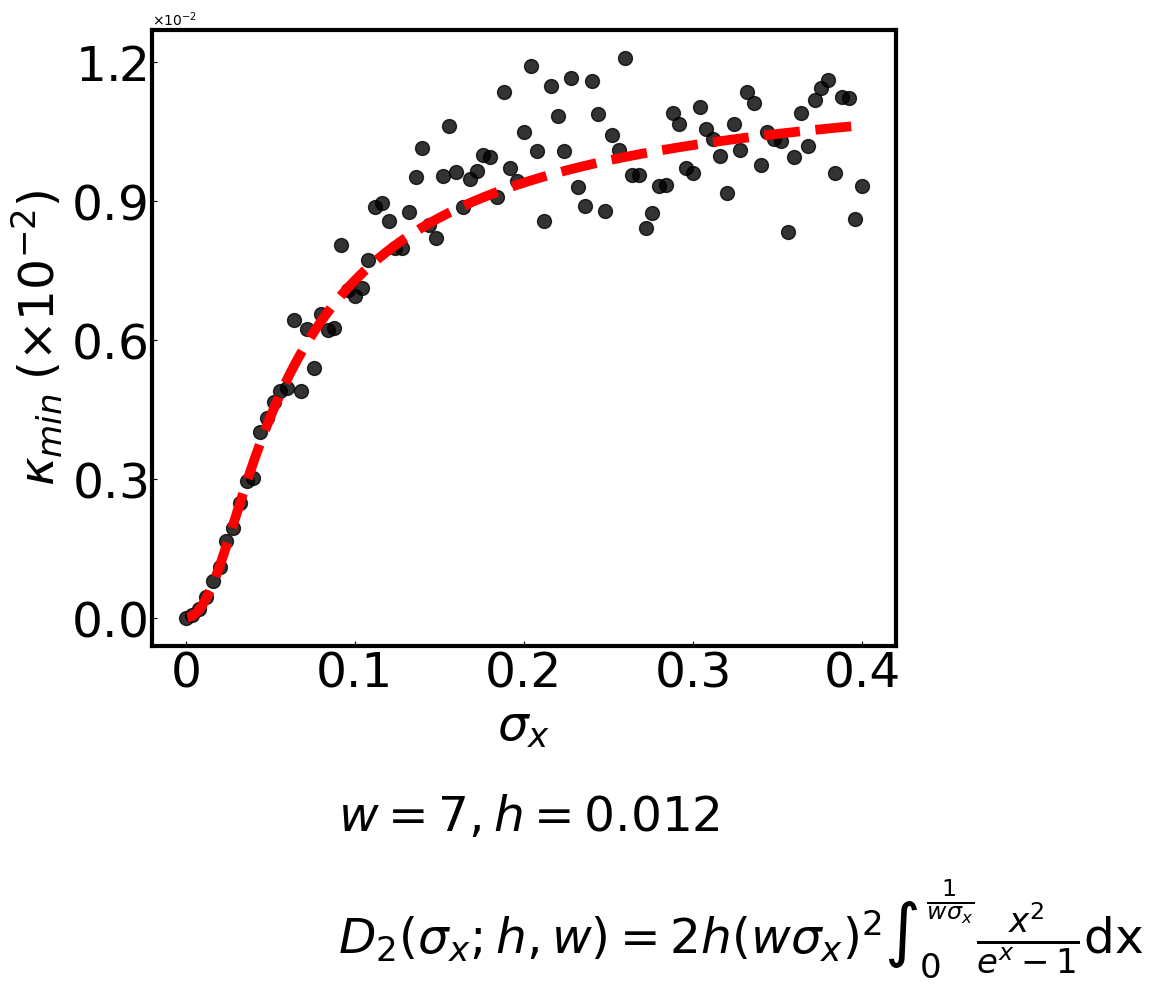

In [6]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.pyplot import MultipleLocator
from matplotlib.pyplot import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter

legs = 3
m_or_nm = 2  # 1 for Markov, 2 for Non-Markov

equal_0 = 'g'   
change = 't'

sizesizesize = 20
file_path = ''  
if legs == 3:
    file_path = 'Markovian_N3_total.CSV' if m_or_nm == 1 else 'non_Markovian_N3_total.CSV'
elif legs == 4:
    file_path = 'Braided_total.CSV'

dataframe = pd.read_csv(file_path)
print(file_path)

filtered_df = dataframe.loc[(dataframe[equal_0] == 0) & (dataframe[change] <= 0.4)]
sorted_df = filtered_df.sort_values(by=change)
c_values = sorted_df['col_value'].tolist()
column_change_sorted_values = sorted_df[change].tolist()

def f(sigma, w, h):
    integral_result, _ = quad(lambda x: x**2 / (np.exp(x) - 1), 0, 1/(sigma*w))
    return h * 2 * w**2 * sigma**2 * integral_result
w = 7
h = 0.012
sizeee = 35
sigma_values = np.arange(0.001, 0.401, 0.001)  
list_data = [(sigma, f(sigma, w, h)) for sigma in sigma_values]

plt.figure(figsize=(9.6, 8))  
plt.scatter(column_change_sorted_values, c_values,color = 'black',s = 100,alpha=0.8)
plt.tick_params(labelsize = sizeee)
plt.plot(*zip(*list_data), color='red',linestyle = '--',linewidth = 7)  

plt.text(0.25, -0.5, r'$D_2(\sigma_x;h,w) = 2h (w \sigma_x)^2 \int_{0}^{\frac{1}{w \sigma_x}} \frac{x^2}{e^x-1} \rm{d}x$',fontdict={'family' : 'Times New Roman', 'size':sizeee}, transform=plt.gca().transAxes)
plt.text(0.25, -0.3, f'$w = 7, h = 0.012$', fontdict={'family' : 'Times New Roman', 'size':sizeee}, transform=plt.gca().transAxes)
plt.ylabel(r'$\kappa_{min}\thickspace (\times 10^{-2})$',fontsize = sizeee)
plt.xlabel("$\sigma_x$",fontsize = sizeee)
plt.xlim((-0.02, 0.42))
plt.tick_params(direction = 'in')
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(0.003))
ax.xaxis.set_major_locator(MultipleLocator(0.1))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(sizeee)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(sizeee)

ticks = ax.set_xticklabels([0.00,0, 0.1, 0.2,0.3,0.4])

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))
ax.yaxis.set_major_formatter(formatter)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
plt.show()

Code for Figure.5(a) of paper

In [ ]:
import math
import numpy as np
from numpy import *
import time
# import matplotlib.pyplot as plt

N = 3
transition_frequency_of_atom = 1
Ta = 2*np.pi/transition_frequency_of_atom

nk = 0
K = nk * N + 1
tmax = 2.6*Ta
gamma_tau = 0.001
T = 2 * K * pi / N / transition_frequency_of_atom -1/2*N*gamma_tau*(1/tan(K*pi/N)) /transition_frequency_of_atom
gamma = gamma_tau/T 

list_g = [0.0, 0.0, 0.1, 0.0, 0.2]
list_x = [0.0, 0.1, 0.0, 0.2, 0.0]
index = 0
while index < len(list_g):
    num_figure = 100
    Result = [0] * num_figure
    figure = 0
    sigma_g = list_g[index]
    sigma_x = list_x[index]
    sigma_phi = 0.29
    f = 'markov N3 ' + 'g' +str(list_g[index]) + ' t' + str(sigma_x) +  ' phi' + str(sigma_phi) + '.txt'
    while figure < num_figure:
        start = time.time()
        gg_random = []                                          
        for i in range(N):
            a=np.random.normal(loc=0, scale=sigma_g, size=None)    
            gg_random.append(a)
        xx_random = []                                          
        for i in range(N):
            a=np.random.normal(loc=0, scale=sigma_x, size=None)
            xx_random.append(a)
        phi_random = []                                          
        for i in range(N):
            a=np.random.normal(loc=0, scale=sigma_phi, size=None)
            phi_random.append(a)
        x_random = []                                       
        g_random = []                                     
        for j in range(N):                                  
            b =xx_random[j] + j         
            x_random.append(b)                             
            b =gg_random[j] + 1
            g_random.append(b)                            
            x_random[0] = 0                                  
            if g_random[j] < 0:                          
                break
            if x_random[j] < 0:
                break
        if x_random[j] < 0:
            continue
        if g_random[j] < 0:
            continue
        if x_random[0] > x_random[1]:
            continue
        if x_random[1] > x_random[2]:
            continue                             
        steps = 500000
        dt = T/steps    
        beta_column = dbeta_column = math.ceil((tmax+x_random[-1]*T)/dt)+2 
        aa = math.ceil(x_random[-1]*T/dt)
        beta = np.zeros(beta_column).astype(complex)   
        beta[aa] = 1
        dbeta = np.zeros(dbeta_column).astype(complex) 

        A = -transition_frequency_of_atom*1j
        B = -gamma/2

        dbeta[aa] = A*beta[aa]  
        m = 0
        while m < N:
            mm = 0
            while mm < N:
                bb = math.ceil(-abs(x_random[m]-x_random[mm])*T/dt)
                dbeta[aa] = dbeta[aa] + B*g_random[m]*g_random[mm]*(exp(1j*(phi_random[m] - phi_random[mm])))*beta[bb+aa]
                mm = mm + 1
            m = m + 1

        i = 0
        while i < math.ceil(tmax/dt):
            beta[aa+i+1] = beta[aa+i] + dbeta[aa+i] * dt
            m = 0
            dbeta[aa+i+1] = A*beta[aa+i+1]
            while m < N:
                mm = 0
                while mm < N:
                    bb = math.ceil(-abs(x_random[m]-x_random[mm])*T/dt)
                    dbeta[aa+i+1] = dbeta[aa+i+1] + B*g_random[m]*g_random[mm]*(exp(1j*(phi_random[m] - phi_random[mm])))*beta[bb+aa+i+1]
                    mm = mm + 1
                m = m + 1
            i = i + 1
        data = [0] * (math.ceil(tmax/dt))
        i = 0
        while i < math.ceil(tmax/dt):
            data[i] = (beta[aa+i].real)**2+(beta[aa+i].imag)**2
            i = i + 1
        Result[figure] = np.log(data[math.ceil(2.5*Ta/dt)] / data[math.ceil(2*Ta/dt)]) * (-1) / 2 / (0.5*Ta)
        print(np.log(data[math.ceil(2.5*Ta/dt)] / data[math.ceil(2*Ta/dt)]) * (-1) / 2 / (0.5*Ta))
        figure = figure + 1
        end = time.time()
        print(figure,'RUNNING TIME:',(end-start))
    print("data is:",Result)
    print("mean of result is:",np.mean(Result),"\n")
    with open(f,"a") as file:
        file.write("markov N: "+str(N)+" t: "+str(sigma_x) +" " +"g: " + str(sigma_g) + ' phi:' + str(sigma_phi) + " pingjunzhi: " + str(np.mean(Result)) + "\n")
    ff = "markov N3 total.txt"
    with open(ff,"a") as file:
        file.write("markov N: "+str(N)+" t: "+str(sigma_x) +" " +"g: " + str(sigma_g) + ' phi:' + str(sigma_phi) + " pingjunzhi: " + str(np.mean(Result)) + "\n")

    index = index + 1

Found 3 data groups


C:\Users\23109\AppData\Local\Temp\ipykernel_1980\3981694225.py:102: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0.04, 1, 0.96])


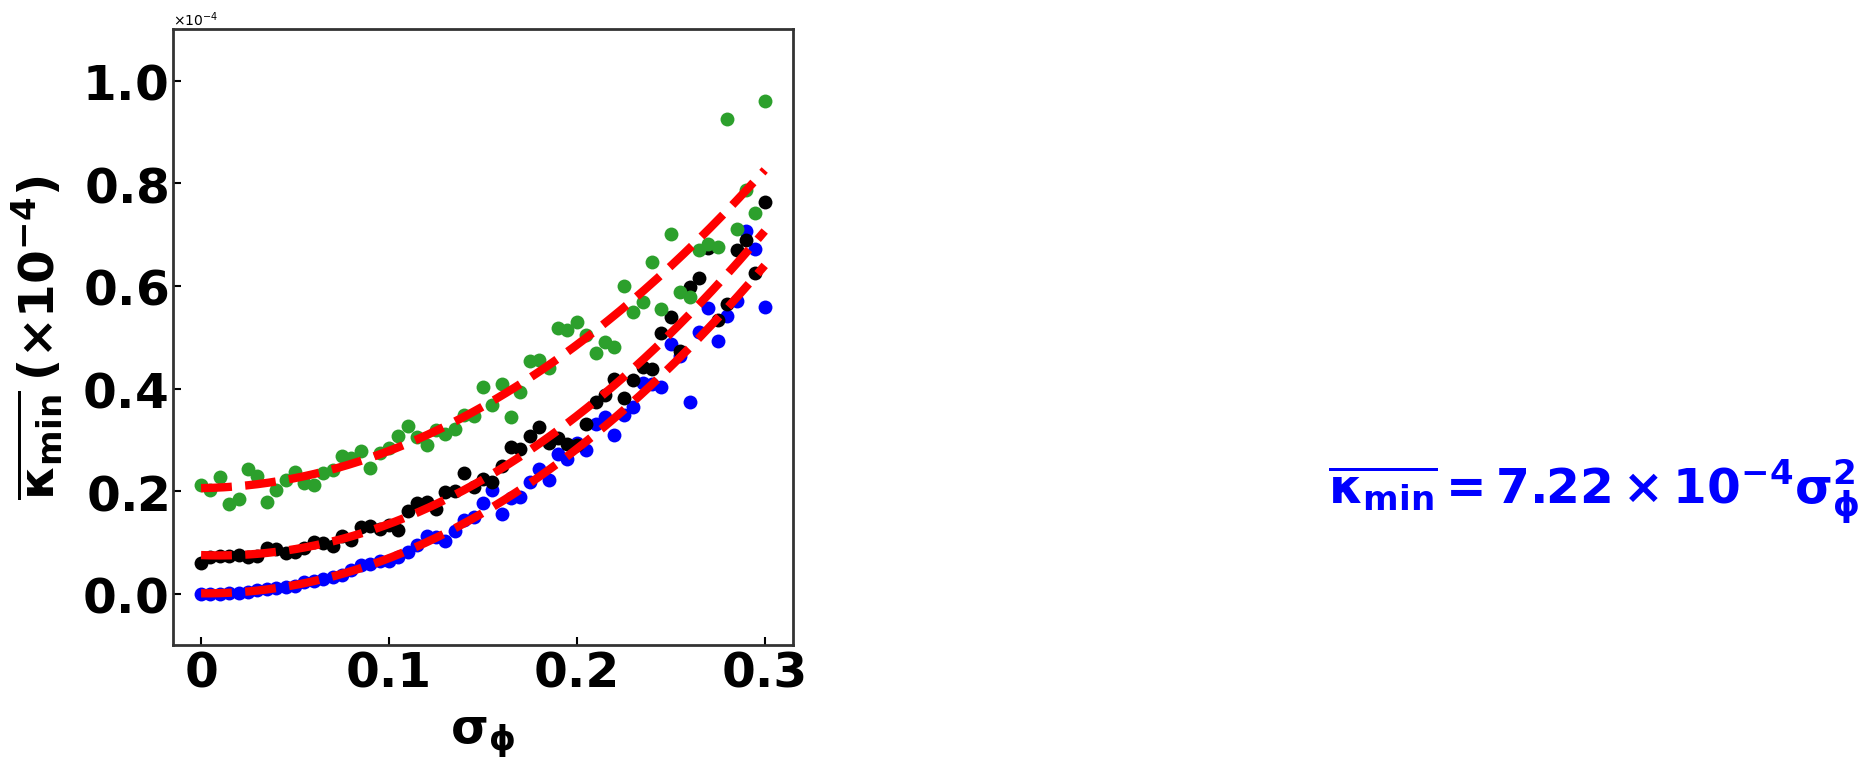

Group Fitting Results Summary:
Group 1: 0.0/0.0
  Equation: y = 0.000722x²
  R-squared: 0.980618
  Data points: 61
----------------------------------------------------------------------
Group 2: 0.0/0.1
  Equation: y = 0.000749x²
  R-squared: 0.978245
  Data points: 61
----------------------------------------------------------------------
Group 3: 0.1/0.0
  Equation: y = 0.000670x²
  R-squared: 0.947758
  Data points: 61
----------------------------------------------------------------------


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.pyplot import MultipleLocator
from matplotlib.pyplot import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter

plt.style.use('default')
mpl.rcParams['font.family'] = 'DejaVu Sans'  

CUSTOM_COLORS = ['blue', 'black', '#2ca02c']  
df = pd.read_csv('Markovian_phase_total.CSV')

data = df.iloc[:, [4, 6, 8, 12]].copy() 
data.columns = ['Col5', 'Col7', 'X', 'Y']  

data['GroupLabel'] = data['Col5'].astype(str) + '/' + data['Col7'].astype(str)
data = data.dropna(subset=['X', 'Y'])
groups = data.groupby('GroupLabel')
print(f"Found {len(groups)} data groups")
fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(False)  

fit_results = []
sizesize = 35

for i, (group_label, group_data) in enumerate(groups):
    if i >= 3: 
        break
    x = group_data['X'].values.reshape(-1, 1)
    y = group_data['Y'].values
    if len(x) < 3:
        print(f"Skipping group '{group_label}' (only {len(x)} data points)")
        continue
    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    r2 = r2_score(y, y_pred)
    coeff = model.coef_
    intercept = model.intercept_
    fit_results.append({
        'group': group_label,
        'equation': f"y = {coeff[2]:.6f}x²",
        'r2': r2,
        'n_points': len(x)
    })
    
    x_range = np.linspace(min(x)[0], max(x)[0], 300).reshape(-1, 1)
    x_range_poly = poly.transform(x_range)
    y_range = model.predict(x_range_poly)

    group_color = CUSTOM_COLORS[i]
    ax.scatter(x, y, color=group_color, s=100, alpha=1, 
               edgecolor='w', linewidth=0, label=group_label, zorder=1)
    ax.plot(x_range, y_range, color='r', linewidth=6, 
            linestyle='--', alpha=1, zorder=5)
ax.set_xlabel('Column 9 Value', fontsize=sizesize, labelpad=12)
ax.set_ylabel('Column 13 Value', fontsize=sizesize, labelpad=12)

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines[:].set_linewidth(1.5)
ax.spines[:].set_color('#333333')
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
for label in ax.get_xticklabels():
    label.set_weight('bold')
for label in ax.get_yticklabels():
    label.set_weight('bold')

ax.tick_params(axis='both', which='both', colors='black', 
               width=1.5, length=6, labelsize=12)

plt.ylim(-0.00001,0.00011)

plt.xticks([0, 0.1, 0.2, 0.3])  
ticks = ax.set_xticklabels([0, 0.1, 0.2,0.3])
plt.tick_params(labelsize = sizesize, direction = 'in')
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))
ax.yaxis.set_major_formatter(formatter)
plt.ylabel(r'$\bf{\overline{\kappa_{min}}\thickspace (\times 10^{-4})}$',fontdict={'family' : 'Times New Roman', 'size':sizesize})
plt.xlabel(r'$\bf{\sigma_{\phi} } $',fontdict={'family' : 'Times New Roman', 'size':sizesize})
equation_2 = r'$\bf{\overline{\kappa_{{min}}} = 7.22 \times 10^{-4} \sigma_{\phi}^{2}} $'  
plt.text((np.min(x) + np.max(x)) /0.5, min(y), equation_2, fontdict={'family' : 'Times New Roman', 'size':sizesize}, color='blue')

plt.tight_layout(rect=[0, 0.04, 1, 0.96]) 
plt.show()

print("="*80)
print("Group Fitting Results Summary:")
for i, res in enumerate(fit_results):
    print(f"Group {i+1}: {res['group']}")
    print(f"  Equation: {res['equation']}")
    print(f"  R-squared: {res['r2']:.6f}")
    print(f"  Data points: {res['n_points']}")
    print("-"*70)
print("="*80)


Code for Figure.5(b) of paper

In [ ]:
import math
import numpy as np
from numpy import *
import time
# import matplotlib.pyplot as plt

N = 3
transition_frequency_of_atom = 1
Ta = 2*np.pi/transition_frequency_of_atom
nk = 2
K = nk * N + 1
dw = 0.05
gamma = dw / abs(N * (1 / np.tan (K*pi/N)) / 2)
T = 2 * np.pi * K / N / (transition_frequency_of_atom + N * gamma * (1/ np.tan (K * np.pi / N) ) / 2)
tmax = 55.5 * Ta

list_g = [0.0, 0.0, 0.1, 0.0, 0.2]
list_x = [0.0, 0.1, 0.0, 0.2, 0.0]
index = 0
while index < len(list_g):
    num_figure = 100
    Result = [0] * num_figure
    figure = 0
    sigma_g = list_g[index]
    sigma_x = list_x[index]
    sigma_phi = 0.29
    f = 'non-markov N3 ' + 'g' +str(list_g[index]) + ' t' + str(sigma_x) +  ' phi' + str(sigma_phi) + '.txt'
    while figure < num_figure:
        start = time.time()
        gg_random = []                                          
        for i in range(N):
            a=np.random.normal(loc=0, scale=sigma_g, size=None)    
            gg_random.append(a)
        xx_random = []                                          
        for i in range(N):
            a=np.random.normal(loc=0, scale=sigma_x, size=None)
            xx_random.append(a)
        phi_random = []                                          
        for i in range(N):
            a=np.random.normal(loc=0, scale=sigma_phi, size=None)
            phi_random.append(a)
        x_random = []                                       
        g_random = []                                     
        for j in range(N):                                  
            b =xx_random[j] + j         
            x_random.append(b)                             
            b =gg_random[j] + 1
            g_random.append(b)                            
            x_random[0] = 0                                  
            if g_random[j] < 0:                          
                break
            if x_random[j] < 0:
                break
        if x_random[j] < 0:
            continue
        if g_random[j] < 0:
            continue
        if x_random[0] > x_random[1]:
            continue
        if x_random[1] > x_random[2]:
            continue                             
        steps = 500000
        dt = T/steps    
        beta_column = dbeta_column = math.ceil((tmax+x_random[-1]*T)/dt)+2 
        aa = math.ceil(x_random[-1]*T/dt)
        beta = np.zeros(beta_column).astype(complex)   
        beta[aa] = 1
        dbeta = np.zeros(dbeta_column).astype(complex) 

        A = -transition_frequency_of_atom*1j
        B = -gamma/2

        dbeta[aa] = A*beta[aa]  
        m = 0
        while m < N:
            mm = 0
            while mm < N:
                bb = math.ceil(-abs(x_random[m]-x_random[mm])*T/dt)
                dbeta[aa] = dbeta[aa] + B*g_random[m]*g_random[mm]*(exp(1j*(phi_random[m] - phi_random[mm])))*beta[bb+aa]
                mm = mm + 1
            m = m + 1

        i = 0
        while i < math.ceil(tmax/dt):
            beta[aa+i+1] = beta[aa+i] + dbeta[aa+i] * dt
            m = 0
            dbeta[aa+i+1] = A*beta[aa+i+1]
            while m < N:
                mm = 0
                while mm < N:
                    bb = math.ceil(-abs(x_random[m]-x_random[mm])*T/dt)
                    dbeta[aa+i+1] = dbeta[aa+i+1] + B*g_random[m]*g_random[mm]*(exp(1j*(phi_random[m] - phi_random[mm])))*beta[bb+aa+i+1]
                    mm = mm + 1
                m = m + 1
            i = i + 1
        data = [0] * (math.ceil(tmax/dt))
        i = 0
        while i < math.ceil(tmax/dt):
            data[i] = (beta[aa+i].real)**2+(beta[aa+i].imag)**2
            i = i + 1
        Result[figure] = np.log(data[math.ceil(55*Ta/dt)] / data[math.ceil(50*Ta/dt)]) * (-1) / 2 / (5*Ta)
        print(np.log(data[math.ceil(55*Ta/dt)] / data[math.ceil(50*Ta/dt)]) * (-1) / 2 / (5*Ta))
        figure = figure + 1
        end = time.time()
        print(figure,'RUNNING TIME:',(end-start))
    print("data is:",Result)
    print("mean of result is:",np.mean(Result),"\n")
    with open(f,"a") as file:
        file.write("non-markov N: "+str(N)+" t: "+str(sigma_x) +" " +"g: " + str(sigma_g) + ' phi:' + str(sigma_phi) + " pingjunzhi: " + str(np.mean(Result)) + "\n")
    ff = "non-markov N3 total.txt"
    with open(ff,"a") as file:
        file.write("non-markov N: "+str(N)+" t: "+str(sigma_x) +" " +"g: " + str(sigma_g) + ' phi:' + str(sigma_phi) + " pingjunzhi: " + str(np.mean(Result)) + "\n")

    index = index + 1

Found 3 data groups


C:\Users\23109\AppData\Local\Temp\ipykernel_1980\1045996742.py:115: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0.04, 1, 0.96])


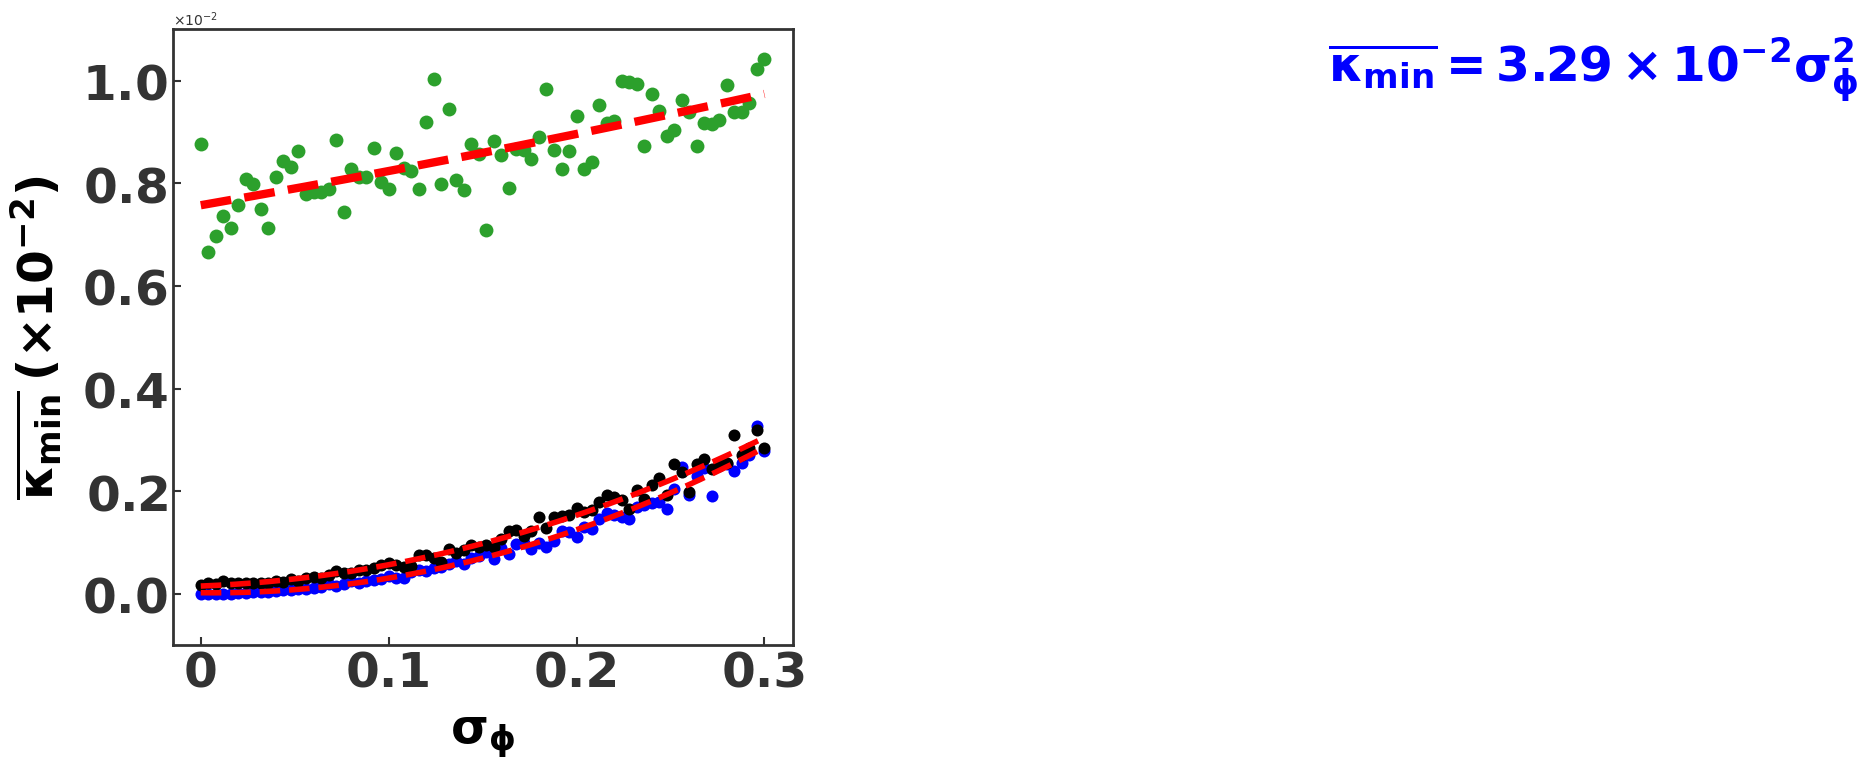

Group Fitting Results Summary:
Group 1: 0.0/0.0
  Equation: y = 0.0000 + -0.0004x + 0.0329x²
  R-squared: 0.982350
  Data points: 76
----------------------------------------------------------------------
Group 2: 0.0/0.1
  Equation: y = 0.0002 + 0.0014x + 0.0274x²
  R-squared: 0.983209
  Data points: 76
----------------------------------------------------------------------
Group 3: 0.1/0.0
  Equation: y = 0.0076 + 0.0064x + 0.0028x²
  R-squared: 0.578131
  Data points: 76
----------------------------------------------------------------------


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.pyplot import MultipleLocator
from matplotlib.pyplot import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter

plt.style.use('default')
mpl.rcParams['font.family'] = 'DejaVu Sans'  

CUSTOM_COLORS = ['blue', 'black', '#2ca02c']  
dots = [75,75,100]
lines = [4,4,6]
df = pd.read_csv('non_Markovian_phase_total.CSV')

data = df.iloc[:, [4, 6, 8, 10]].copy()  
data.columns = ['Col5', 'Col7', 'X', 'Y']  

data['GroupLabel'] = data['Col5'].astype(str) + '/' + data['Col7'].astype(str)
data = data.dropna(subset=['X', 'Y'])

groups = data.groupby('GroupLabel')
print(f"Found {len(groups)} data groups")

fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(False) 

fit_results = []
for i, (group_label, group_data) in enumerate(groups):
    if i >= 3: 
        break
        
    x = group_data['X'].values.reshape(-1, 1)
    y = group_data['Y'].values
    if len(x) < 3:
        print(f"Skipping group '{group_label}' (only {len(x)} data points)")
        continue

    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)

    y_pred = model.predict(x_poly)
    r2 = r2_score(y, y_pred)

    coeff = model.coef_
    intercept = model.intercept_
    fit_results.append({
        'group': group_label,
        'equation': f"y = {intercept:.4f} + {coeff[1]:.4f}x + {coeff[2]:.4f}x²",
        'r2': r2,
        'n_points': len(x)
    })

    x_range = np.linspace(min(x)[0], max(x)[0], 300).reshape(-1, 1)
    x_range_poly = poly.transform(x_range)
    y_range = model.predict(x_range_poly)

    group_color = CUSTOM_COLORS[i]
    group_dotcolor = dots[i]
    group_lines = lines[i]

    ax.scatter(x, y, color=group_color, s=group_dotcolor, alpha=1, 
               edgecolor='w', linewidth=0, label=group_label, zorder=1)

    ax.plot(x_range, y_range, color='r', linewidth=group_lines, 
            linestyle='--', alpha=1, zorder=5)

ax.set_xlabel('Column 9 Value', fontsize=35, labelpad=12)
ax.set_ylabel('Column 13 Value', fontsize=35, labelpad=12)

plt.ylim(-0.001,0.011)

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines[:].set_linewidth(1.5)
ax.spines[:].set_color('#333333')
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
for label in ax.get_xticklabels():
    label.set_weight('bold')
for label in ax.get_yticklabels():
    label.set_weight('bold')

ax.tick_params(axis='both', which='both', colors='#333333', 
               width=1.5, length=6, labelsize=12)

plt.xticks([0, 0.1, 0.2, 0.3])  
ticks = ax.set_xticklabels([0, 0.1, 0.2,0.3])

plt.tick_params(labelsize = 35,direction = 'in')
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))
ax.yaxis.set_major_formatter(formatter)
plt.ylabel(r'$\bf{\overline{\kappa_{min}}\thickspace (\times 10^{-2})}$',fontdict={'family' : 'Times New Roman', 'size':35})
plt.xlabel(r'$\bf{\sigma_{\phi}} $',fontdict={'family' : 'Times New Roman', 'size':35})

equation_3 = r'$\bf{\overline{\kappa_{{min}}} = 3.29 \times 10^{-2} \sigma_{\phi}^{2}}$' 
plt.text((np.min(x) + np.max(x)) /0.5, 1.5*min(y), equation_3, fontdict={'family' : 'Times New Roman', 'size':sizesize}, color='blue')

plt.tight_layout(rect=[0, 0.04, 1, 0.96])  
plt.savefig('grouped_fit.png', dpi=300, bbox_inches='tight', 
            edgecolor=fig.get_edgecolor(), facecolor='white')
plt.show()

print("="*80)
print("Group Fitting Results Summary:")
for i, res in enumerate(fit_results):
    print(f"Group {i+1}: {res['group']}")
    print(f"  Equation: {res['equation']}")
    print(f"  R-squared: {res['r2']:.6f}")
    print(f"  Data points: {res['n_points']}")
    print("-"*70)
print("="*80)


Code for Figure.6(a) of paper

In [ ]:
from sympy import *
import numpy as np
from sympy.matrices import Matrix
import matplotlib.pyplot as plt
def delta(a,b):
    if a == b:
        return 1
    else:
        return 0

transition_frequency_of_atom_a = 1
transition_frequency_of_atom_b = 1

gamma = 0.05
gamma_1 = gamma
gamma_2 = gamma
gamma_3 = gamma
gamma_4 = gamma

unit_matrix = Matrix([[1,0],[0,1]])  
sigma_z = Matrix([[1,0],[0,-1]])
sigma_plus = Matrix([[0,1],[0,0]])
sigma_minus = Matrix([[0,0],[1,0]])

zero = Matrix([[0],[1]])
one = Matrix([[1],[0]])
# vector_list_1 and vector_list_2
vl1 = [zero , zero , one , one]
vl2 = [zero , one , zero , one]

basis_vector_gg = Matrix([[1],[0],[0],[0]])
basis_vector_ge = Matrix([[0],[1],[0],[0]])
basis_vector_eg = Matrix([[0],[0],[1],[0]])
basis_vector_ee = Matrix([[0],[0],[0],[1]])
basis_vl = (basis_vector_gg , basis_vector_ge , basis_vector_eg , basis_vector_ee)


a1 = symbols('a1',real=True)
a2 = symbols('a2',real=True)
a3 = symbols('a3',real=True)
a4 = symbols('a4',real=True)
a5 = symbols('a5',real=True)
a6 = symbols('a6',real=True)
a7 = symbols('a7',real=True)
a8 = symbols('a8',real=True)
a9 = symbols('a9',real=True)
a10 = symbols('a10',real=True)
a11 = symbols('a11',real=True)
a12 = symbols('a12',real=True)
a13 = symbols('a13',real=True)
a14 = symbols('a14',real=True)
a15 = symbols('a15',real=True)
a16 = symbols('a16',real=True)

density_matrix = Matrix([[a1,a2,a3,a4],[a5,a6,a7,a8],[a9,a10,a11,a12],[a13,a14,a15,a16]])
coefficient_matrix = zeros(16,16)
density_matrix_flatten = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16]

xaxis = []
eigenvalue_real = []
eigenvalue_imaginary = []

varphi_list = np.linspace(0,1,1001)

for Index in range(len(varphi_list)):

    varphi = np.pi * varphi_list[Index]
    varphi_1 = varphi
    varphi_2 = varphi
    varphi_3 = varphi

 
    A1 = transition_frequency_of_atom_a + sqrt(gamma_1 * gamma_3) * sin(varphi_1 + varphi_2)
    A2 = transition_frequency_of_atom_b + sqrt(gamma_2 * gamma_4) * sin(varphi_2 + varphi_3)
    A3 = sqrt(gamma_1 * gamma_2) * sin(varphi_1) + sqrt(gamma_2 * gamma_3) * sin(varphi_2) + sqrt(gamma_3 * gamma_4) * sin(varphi_3) + sqrt(gamma_1 * gamma_4) * sin(varphi_1 + varphi_2 + varphi_3)
    A4 = gamma_1 + gamma_3 + 2 * sqrt(gamma_1 * gamma_3) * cos(varphi_1 + varphi_2)
    A5 = gamma_2 + gamma_4 + 2 * sqrt(gamma_2 * gamma_4) * cos(varphi_2 + varphi_3)
    A6 = sqrt(gamma_1 * gamma_2) * cos(varphi_1) + sqrt(gamma_2 * gamma_3) * cos(varphi_2) + sqrt(gamma_3 * gamma_4) * cos(varphi_3) + sqrt(gamma_1 * gamma_4) * cos(varphi_1 + varphi_2 + varphi_3)

    for i in range(sqrt(len(density_matrix_flatten))):
        for j in range(sqrt(len(density_matrix_flatten))):
            matrix_element = Matrix([[0]])
            for k in range(sqrt(len(density_matrix_flatten))):
                for m in range(sqrt(len(density_matrix_flatten))):
                    for q in range(sqrt(len(density_matrix_flatten))):
                        matrix_element = matrix_element - 1j * A1 * (vl1[i].T) @ sigma_z @ vl1[q] * (vl2[i].T) @ unit_matrix @ vl2[q] * delta(q,k) * delta(j,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                        - 1j * A2 * (vl1[i].T) @ unit_matrix @ vl1[q] * (vl2[i].T) @ sigma_z @ vl2[q] * delta(q,k) * delta(j,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                        - 1j * A3 * (vl1[i].T) @ sigma_minus @ vl1[q] * (vl2[i].T) @ sigma_plus @ vl2[q] * delta(q,k) * delta(j,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                        - 1j * A3 * (vl1[i].T) @ sigma_plus @ vl1[q] * (vl2[i].T) @ sigma_minus @ vl2[q] * delta(q,k) * delta(j,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                        + 1j * A1 * (vl1[q].T) @ sigma_z @ vl1[j] * (vl2[q].T) @ unit_matrix @ vl2[j] * delta(i,k) * delta(q,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                        + 1j * A2 * (vl1[q].T) @ unit_matrix @ vl1[j] * (vl2[q].T) @ sigma_z @ vl2[j] * delta(i,k) * delta(q,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                        + 1j * A3 * (vl1[q].T) @ sigma_minus @ vl1[j] * (vl2[q].T) @ sigma_plus @ vl2[j] * delta(i,k) * delta(q,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                        + 1j * A3 * (vl1[q].T) @ sigma_plus @ vl1[j] * (vl2[q].T) @ sigma_minus @ vl2[j] * delta(i,k) * delta(q,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                        - 1/2 * A4 * (vl1[i].T) @ sigma_plus @ sigma_minus @ vl1[q] * (vl2[i].T) @ unit_matrix @ vl2[q] * delta(q,k) * delta(j,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                        - 1/2 * A4 * (vl1[q].T) @ sigma_plus @ sigma_minus @ vl1[j] * (vl2[q].T) @ unit_matrix @ vl2[j] * delta(i,k) * delta(q,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                        - 1/2 * A5 * (vl1[i].T) @ unit_matrix @ vl1[q] * (vl2[i].T) @ sigma_plus @ sigma_minus @ vl2[q] * delta(q,k) * delta(j,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                        - 1/2 * A5 * (vl1[q].T) @ unit_matrix @ vl1[j] * (vl2[q].T) @ sigma_plus @ sigma_minus @ vl2[j] * delta(i,k) * delta(q,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                        - 1/2 * A6 * (vl1[i].T) @ sigma_plus @ vl1[q] * (vl2[i].T) @ sigma_minus @ vl2[q] * delta(q,k) * delta(j,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                        - 1/2 * A6 * (vl1[i].T) @ sigma_minus @ vl1[q] * (vl2[i].T) @ sigma_plus @ vl2[q] * delta(q,k) * delta(j,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                        - 1/2 * A6 * (vl1[q].T) @ sigma_plus @ vl1[j] * (vl2[q].T) @ sigma_minus @ vl2[j] * delta(i,k) * delta(q,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                        - 1/2 * A6 * (vl1[q].T) @ sigma_minus @ vl1[j] * (vl2[q].T) @ sigma_plus @ vl2[j] * delta(i,k) * delta(q,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m]
            for d in range(sqrt(len(density_matrix_flatten))):
                for e in range(sqrt(len(density_matrix_flatten))):
                    for p in range(sqrt(len(density_matrix_flatten))):
                        for r in range(sqrt(len(density_matrix_flatten))):
                            matrix_element = matrix_element + A4 * (vl1[i].T) @ sigma_minus @ vl1[p] * (vl2[i].T) @ unit_matrix @ vl2[p] * (vl1[r].T) @ sigma_plus @ vl1[j] * (vl2[r].T) @ unit_matrix @ vl2[j] * delta(p,d) * delta(r,e) * (basis_vl[d].T) @ density_matrix @ basis_vl[e] \
                            + A5 * (vl1[i].T) @ unit_matrix @ vl1[p] * (vl2[i].T) @ sigma_minus @ vl2[p] * (vl1[r].T) @ unit_matrix @ vl1[j] * (vl2[r].T) @ sigma_plus @ vl2[j] * delta(p,d) * delta(r,e) * (basis_vl[d].T) @ density_matrix @ basis_vl[e] \
                            + A6 * (vl1[i].T) @ sigma_minus @ vl1[p] * (vl2[i].T) @ unit_matrix @ vl2[p] * (vl1[r].T) @ unit_matrix @ vl1[j] * (vl2[r].T) @ sigma_plus @ vl2[j] * delta(p,d) * delta(r,e) * (basis_vl[d].T) @ density_matrix @ basis_vl[e] \
                            + A6 * (vl1[i].T) @ unit_matrix @ vl1[p] * (vl2[i].T) @ sigma_minus @ vl2[p] * (vl1[r].T) @ sigma_plus @ vl1[j] * (vl2[r].T) @ unit_matrix @ vl2[j] * delta(p,d) * delta(r,e) * (basis_vl[d].T) @ density_matrix @ basis_vl[e]
            jj = 0
            while jj < 16:
                coefficient_matrix[(i*4+j)*16+jj] = matrix_element[0].coeff(density_matrix_flatten[jj],1)
                jj = jj + 1
    eigenvalue = coefficient_matrix.eigenvals()
    for key in eigenvalue.items():
        xaxis.append(varphi_list[Index])
        eigenvalue_real.append(re(key[0]))
        eigenvalue_imaginary.append(im(key[0]))
plt.xlabel("Phase ($\pi$)",fontdict={'family' : 'Times New Roman', 'size':25})  
# plt.ylabel("The real part of eigenvalue",fontdict={'family' : 'Times New Roman', 'size':25}) 
plt.scatter(xaxis,eigenvalue_real,s = 10 , c = 'b')
plt.scatter(xaxis,eigenvalue_imaginary,s=10,c='r')
plt.figure(figsize=(112, 5))
plt.rcParams['figure.figsize']=(20.8, 3.6)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

sizzz = 25
ss = 0.5
fig, ax1 = plt.subplots(figsize=(6.5, 6.5))  

ax1.scatter(xaxis, eigenvalue_real, s=ss, c='b', label='Real',alpha=0.2)
ax1.set_ylabel('Real Values (Re($\lambda_j$))', color='black',fontsize=sizzz*1.3,fontweight = 'bold')
ax1.tick_params(axis='y', labelcolor='b', labelsize=sizzz*1.3)

ax2 = ax1.twinx()  
ax2.scatter(xaxis, eigenvalue_imaginary, s=ss, c='r', label='Imaginary',alpha=0.2)
ax2.set_ylabel('Imaginary Values (Im($\lambda_j$))', color='black',fontsize=sizzz*1.3,fontweight = 'bold')
ax2.tick_params(axis='y', labelcolor='r', labelsize=sizzz*1.3)
ax2.tick_params(axis='x', labelcolor='black', labelsize=sizzz*1.3)
ax2.set_ylim(bottom=-5, top=7)

ax1.set_xlabel(r'$\bf{\varphi_0 / \pi}$',fontdict={'family' : 'Times New Roman', 'size':sizzz*1.3})  
ax1.tick_params(axis='x', labelcolor='black', labelsize=sizzz*1.3)

plt.figure(figsize=(10, 10)) 
ax1.spines['top'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)

ax1.tick_params(direction = 'in')
ax2.tick_params(direction = 'in')
for label in ax1.get_yticklabels():
    label.set_weight('bold')
for label in ax1.get_xticklabels():
    label.set_weight('bold')
for label in ax2.get_yticklabels():
    label.set_weight('bold')
plt.show()

Code for Figure.6(b) of paper

In [ ]:
###Decoherence free interaction
from sympy import *
import numpy as np
from sympy.matrices import Matrix
# import matplotlib.pyplot as plt
import time
def delta(a,b):
    if a == b:
        return 1
    else:
        return 0

transition_frequency_of_atom_a = 1
transition_frequency_of_atom_b = 1

unit_matrix = Matrix([[1,0],[0,1]])
sigma_z = Matrix([[1,0],[0,-1]])
sigma_plus = Matrix([[0,1],[0,0]])
sigma_minus = Matrix([[0,0],[1,0]])

zero = Matrix([[0],[1]])
one = Matrix([[1],[0]])

vl1 = [zero , zero , one , one]
vl2 = [zero , one , zero , one]

basis_vector_gg = Matrix([[1],[0],[0],[0]])
basis_vector_ge = Matrix([[0],[1],[0],[0]])
basis_vector_eg = Matrix([[0],[0],[1],[0]])
basis_vector_ee = Matrix([[0],[0],[0],[1]])
basis_vl = (basis_vector_gg , basis_vector_ge , basis_vector_eg , basis_vector_ee)

a1 = symbols('a1',real=True)
a2 = symbols('a2',real=True)
a3 = symbols('a3',real=True)
a4 = symbols('a4',real=True)
a5 = symbols('a5',real=True)
a6 = symbols('a6',real=True)
a7 = symbols('a7',real=True)
a8 = symbols('a8',real=True)
a9 = symbols('a9',real=True)
a10 = symbols('a10',real=True)
a11 = symbols('a11',real=True)
a12 = symbols('a12',real=True)
a13 = symbols('a13',real=True)
a14 = symbols('a14',real=True)
a15 = symbols('a15',real=True)
a16 = symbols('a16',real=True)

density_matrix = Matrix([[a1,a2,a3,a4],[a5,a6,a7,a8],[a9,a10,a11,a12],[a13,a14,a15,a16]])
coefficient_matrix = zeros(16,16)
density_matrix_flatten = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16]

gamma = 0.05
varphi = pi / 2

list_sigma_g = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30]
index_sigma_g = 0
while index_sigma_g < len(list_sigma_g):
    num_figure = 100
    Result = [0] * num_figure
    figure = 0
    sigma_g = list_sigma_g[index_sigma_g]
    sigma_x = 0
    f = 'braided 2 atoms ' + 'gamma' +str(list_sigma_g[index_sigma_g]) + ' varphi' + str(sigma_x) + '.txt'
    while figure < num_figure:
        start = time.time()
        varphi_random = []
        gamma_random = []
        for z in range(3):
            a=np.random.normal(loc=1, scale=sigma_x, size=None)
            varphi_random.append(a)
            if (a >= 2 or a <= 0) :
                break
        if (a >= 2 or a <= 0) :
            continue
        for z in range(4):
            a=np.random.normal(loc=1, scale=sigma_g, size=None)
            gamma_random.append(a)
            if a <= 0 :
                break
        if a <= 0 :
            continue
        print('1',varphi_random)
        print('2',gamma_random)

        varphi_1 = varphi_random[0] * varphi
        varphi_2 = varphi_random[1] * varphi
        varphi_3 = varphi_random[2] * varphi

        gamma_1 = gamma_random[0] * gamma
        gamma_2 = gamma_random[1] * gamma
        gamma_3 = gamma_random[2] * gamma
        gamma_4 = gamma_random[3] * gamma

        A1 = transition_frequency_of_atom_a + sqrt(gamma_1 * gamma_3) * sin(varphi_1 + varphi_2)
        A2 = transition_frequency_of_atom_b + sqrt(gamma_2 * gamma_4) * sin(varphi_2 + varphi_3)
        A3 = sqrt(gamma_1 * gamma_2) * sin(varphi_1) + sqrt(gamma_2 * gamma_3) * sin(varphi_2) + sqrt(gamma_3 * gamma_4) * sin(varphi_3) + sqrt(gamma_1 * gamma_4) * sin(varphi_1 + varphi_2 + varphi_3)
        A4 = gamma_1 + gamma_3 + 2 * sqrt(gamma_1 * gamma_3) * cos(varphi_1 + varphi_2)
        A5 = gamma_2 + gamma_4 + 2 * sqrt(gamma_2 * gamma_4) * cos(varphi_2 + varphi_3)
        A6 = sqrt(gamma_1 * gamma_2) * cos(varphi_1) + sqrt(gamma_2 * gamma_3) * cos(varphi_2) + sqrt(gamma_3 * gamma_4) * cos(varphi_3) + sqrt(gamma_1 * gamma_4) * cos(varphi_1 + varphi_2 + varphi_3)

        for i in range(sqrt(len(density_matrix_flatten))):
            for j in range(sqrt(len(density_matrix_flatten))):
                matrix_element = Matrix([[0]])
                for k in range(sqrt(len(density_matrix_flatten))):
                    for m in range(sqrt(len(density_matrix_flatten))):
                        for q in range(sqrt(len(density_matrix_flatten))):
                            matrix_element = matrix_element - 1j * A1 * (vl1[i].T) @ sigma_z @ vl1[q] * (vl2[i].T) @ unit_matrix @ vl2[q] * delta(q,k) * delta(j,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                            - 1j * A2 * (vl1[i].T) @ unit_matrix @ vl1[q] * (vl2[i].T) @ sigma_z @ vl2[q] * delta(q,k) * delta(j,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                            - 1j * A3 * (vl1[i].T) @ sigma_minus @ vl1[q] * (vl2[i].T) @ sigma_plus @ vl2[q] * delta(q,k) * delta(j,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                            - 1j * A3 * (vl1[i].T) @ sigma_plus @ vl1[q] * (vl2[i].T) @ sigma_minus @ vl2[q] * delta(q,k) * delta(j,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                            + 1j * A1 * (vl1[q].T) @ sigma_z @ vl1[j] * (vl2[q].T) @ unit_matrix @ vl2[j] * delta(i,k) * delta(q,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                            + 1j * A2 * (vl1[q].T) @ unit_matrix @ vl1[j] * (vl2[q].T) @ sigma_z @ vl2[j] * delta(i,k) * delta(q,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                            + 1j * A3 * (vl1[q].T) @ sigma_minus @ vl1[j] * (vl2[q].T) @ sigma_plus @ vl2[j] * delta(i,k) * delta(q,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                            + 1j * A3 * (vl1[q].T) @ sigma_plus @ vl1[j] * (vl2[q].T) @ sigma_minus @ vl2[j] * delta(i,k) * delta(q,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                            - 1/2 * A4 * (vl1[i].T) @ sigma_plus @ sigma_minus @ vl1[q] * (vl2[i].T) @ unit_matrix @ vl2[q] * delta(q,k) * delta(j,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                            - 1/2 * A4 * (vl1[q].T) @ sigma_plus @ sigma_minus @ vl1[j] * (vl2[q].T) @ unit_matrix @ vl2[j] * delta(i,k) * delta(q,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                            - 1/2 * A5 * (vl1[i].T) @ unit_matrix @ vl1[q] * (vl2[i].T) @ sigma_plus @ sigma_minus @ vl2[q] * delta(q,k) * delta(j,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                            - 1/2 * A5 * (vl1[q].T) @ unit_matrix @ vl1[j] * (vl2[q].T) @ sigma_plus @ sigma_minus @ vl2[j] * delta(i,k) * delta(q,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                            - 1/2 * A6 * (vl1[i].T) @ sigma_plus @ vl1[q] * (vl2[i].T) @ sigma_minus @ vl2[q] * delta(q,k) * delta(j,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                            - 1/2 * A6 * (vl1[i].T) @ sigma_minus @ vl1[q] * (vl2[i].T) @ sigma_plus @ vl2[q] * delta(q,k) * delta(j,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                            - 1/2 * A6 * (vl1[q].T) @ sigma_plus @ vl1[j] * (vl2[q].T) @ sigma_minus @ vl2[j] * delta(i,k) * delta(q,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m] \
                            - 1/2 * A6 * (vl1[q].T) @ sigma_minus @ vl1[j] * (vl2[q].T) @ sigma_plus @ vl2[j] * delta(i,k) * delta(q,m) * (basis_vl[k].T) @ density_matrix @ basis_vl[m]
                for d in range(sqrt(len(density_matrix_flatten))):
                    for e in range(sqrt(len(density_matrix_flatten))):
                        for p in range(sqrt(len(density_matrix_flatten))):
                            for r in range(sqrt(len(density_matrix_flatten))):
                                matrix_element = matrix_element + A4 * (vl1[i].T) @ sigma_minus @ vl1[p] * (vl2[i].T) @ unit_matrix @ vl2[p] * (vl1[r].T) @ sigma_plus @ vl1[j] * (vl2[r].T) @ unit_matrix @ vl2[j] * delta(p,d) * delta(r,e) * (basis_vl[d].T) @ density_matrix @ basis_vl[e] \
                                + A5 * (vl1[i].T) @ unit_matrix @ vl1[p] * (vl2[i].T) @ sigma_minus @ vl2[p] * (vl1[r].T) @ unit_matrix @ vl1[j] * (vl2[r].T) @ sigma_plus @ vl2[j] * delta(p,d) * delta(r,e) * (basis_vl[d].T) @ density_matrix @ basis_vl[e] \
                                + A6 * (vl1[i].T) @ sigma_minus @ vl1[p] * (vl2[i].T) @ unit_matrix @ vl2[p] * (vl1[r].T) @ unit_matrix @ vl1[j] * (vl2[r].T) @ sigma_plus @ vl2[j] * delta(p,d) * delta(r,e) * (basis_vl[d].T) @ density_matrix @ basis_vl[e] \
                                + A6 * (vl1[i].T) @ unit_matrix @ vl1[p] * (vl2[i].T) @ sigma_minus @ vl2[p] * (vl1[r].T) @ sigma_plus @ vl1[j] * (vl2[r].T) @ unit_matrix @ vl2[j] * delta(p,d) * delta(r,e) * (basis_vl[d].T) @ density_matrix @ basis_vl[e]
                jj = 0
                while jj < 16:
                    coefficient_matrix[(i*4+j)*16+jj] = matrix_element[0].coeff(density_matrix_flatten[jj],1)
                    jj = jj + 1
        eigenvalue = coefficient_matrix.eigenvals()
        for key in eigenvalue.items():
            Result[figure] = Result[figure] + (-1) * re(key[0])
        with open(f,"a") as file:
            file.write(str(Result[figure]) + "\n")
        figure = figure + 1
        end = time.time()
        print(figure,'RUNNING TIME:',(end-start))
    print("data is ",Result)
    print("sigma_g is ",sigma_g,"sigma_x is ",sigma_x)
    print("mean of result is ",np.mean(Result),"\n")
    with open(f,"a") as file:
        file.write("braided 2 atoms gamma: "+str(sigma_g) +" " +"varphi: " + str(sigma_x) + " pingjunzhi: " + str(np.mean(Result)) + "\n")
    ff = "braided 2 atoms total.txt"
    with open(ff,"a") as file:
        file.write("braided 2 atoms gamma: "+str(sigma_g) +" " +"varphi: " + str(sigma_x) + " pingjunzhi: " + str(np.mean(Result)) + "\n")
    index_sigma_g = index_sigma_g + 1

C:\Users\23109\AppData\Local\Temp\ipykernel_1980\297032525.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_xticklabels([0.00, 0, 0.1, 0.2, 0.3])
C:\Users\23109\AppData\Local\Temp\ipykernel_1980\297032525.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_yticklabels([0.00, 0, 0.1, 0.2, 0.3])


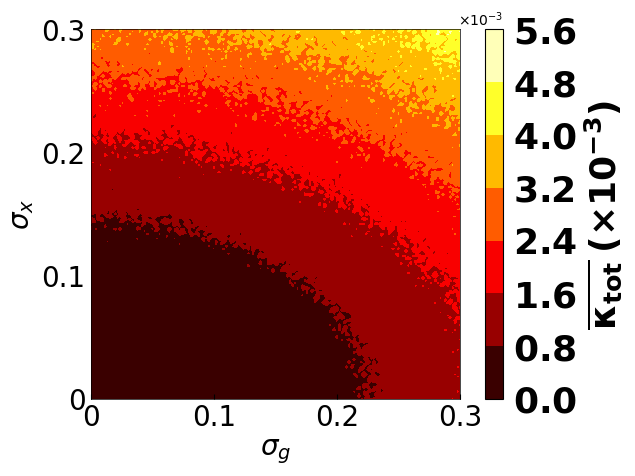

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from matplotlib.pyplot import MultipleLocator
from matplotlib.pyplot import FormatStrFormatter


file_path = 'Braided_total.CSV'  
df = pd.read_csv(file_path)
df_sorted = df.sort_values(by=['t', 'g'])  
df_filtered = df_sorted[(df_sorted['t'] <= 0.3) & (df_sorted['g'] <= 0.3)]  
result_dict = {}  
for index, row in df_filtered.iterrows():   
    key = row['t']
    value = row['col_value']
    if key not in result_dict:
        result_dict[key] = []
    result_dict[key].append(value)
result_lists = list(result_dict.values())  
seen_first_column = set()  
seen_second_column = set()
first_column_values = []
second_column_values = []   
for index, row in df_filtered.iterrows():   
    first_col_val = row['t']
    second_col_val = row['g']
    if first_col_val not in seen_first_column:
        first_column_values.append(first_col_val)
        seen_first_column.add(first_col_val)
    if second_col_val not in seen_second_column:
        second_column_values.append(second_col_val)
        seen_second_column.add(second_col_val)

X,Y = np.meshgrid(second_column_values,first_column_values)
Z = np.array(result_lists)

sizesize = 20
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.contourf(X,Y,Z)
cset = plt.contourf(X,Y,Z,7,cmap=plt.cm.hot) 
contour = plt.contour(X,Y,Z,7, alpha = 0,linestyles='--')
plt.clabel(contour,fontsize=10,colors='b')

cbar = plt.colorbar() 

tick_locator = ticker.MaxNLocator(nbins=10)  
cbar.locator = tick_locator
cbar.update_ticks()
colorbar = fig.colorbar(cset)
colorbar.ax.tick_params(labelsize=sizesize*1.3,which='both', bottom=True, top=False,left=False, right=False)
for text in colorbar.ax.get_yticklabels():
    text.set_weight('black')
colorbar.set_label(r'$\bf{\overline{\kappa_{tot}}\thickspace (\times 10^{-3})}$',fontdict={'family' : 'Times New Roman', 'size':sizesize*1.3})
ax.set_xlabel('$\sigma_g$',fontdict={'family' : 'Times New Roman', 'size':sizesize})
plt.tick_params(labelsize = sizesize,direction = 'in')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylabel('$\sigma_x$',fontdict={'family' : 'Times New Roman', 'size':sizesize})
ticks = ax.set_xticklabels([0.00, 0, 0.1, 0.2, 0.3])
ticks = ax.set_yticklabels([0.00, 0, 0.1, 0.2, 0.3])
ax.spines['top'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
colorbar.formatter = ticker.ScalarFormatter(useMathText=True)
colorbar.formatter.set_powerlimits((0, 0))
colorbar.update_ticks()
ax.tick_params(axis='x', which='both', bottom=True, top=False)
ax.tick_params(axis='y', which='both', left=False, right=False)

plt.show()

Code for Figure.6(c) of paper

braided total.xlsx
Fitted coefficient for x^2: 0.034947996963012394


C:\Users\23109\AppData\Local\Temp\ipykernel_9424\1799254627.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_xticklabels([0.00,0, 0.1, 0.2,0.3])
C:\Users\23109\AppData\Local\Temp\ipykernel_9424\1799254627.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_yticklabels([0.00, 0, 0.00006, 0.00012, 0.00018])


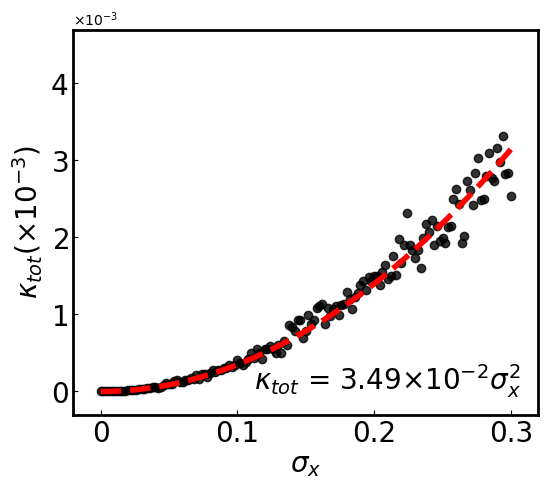

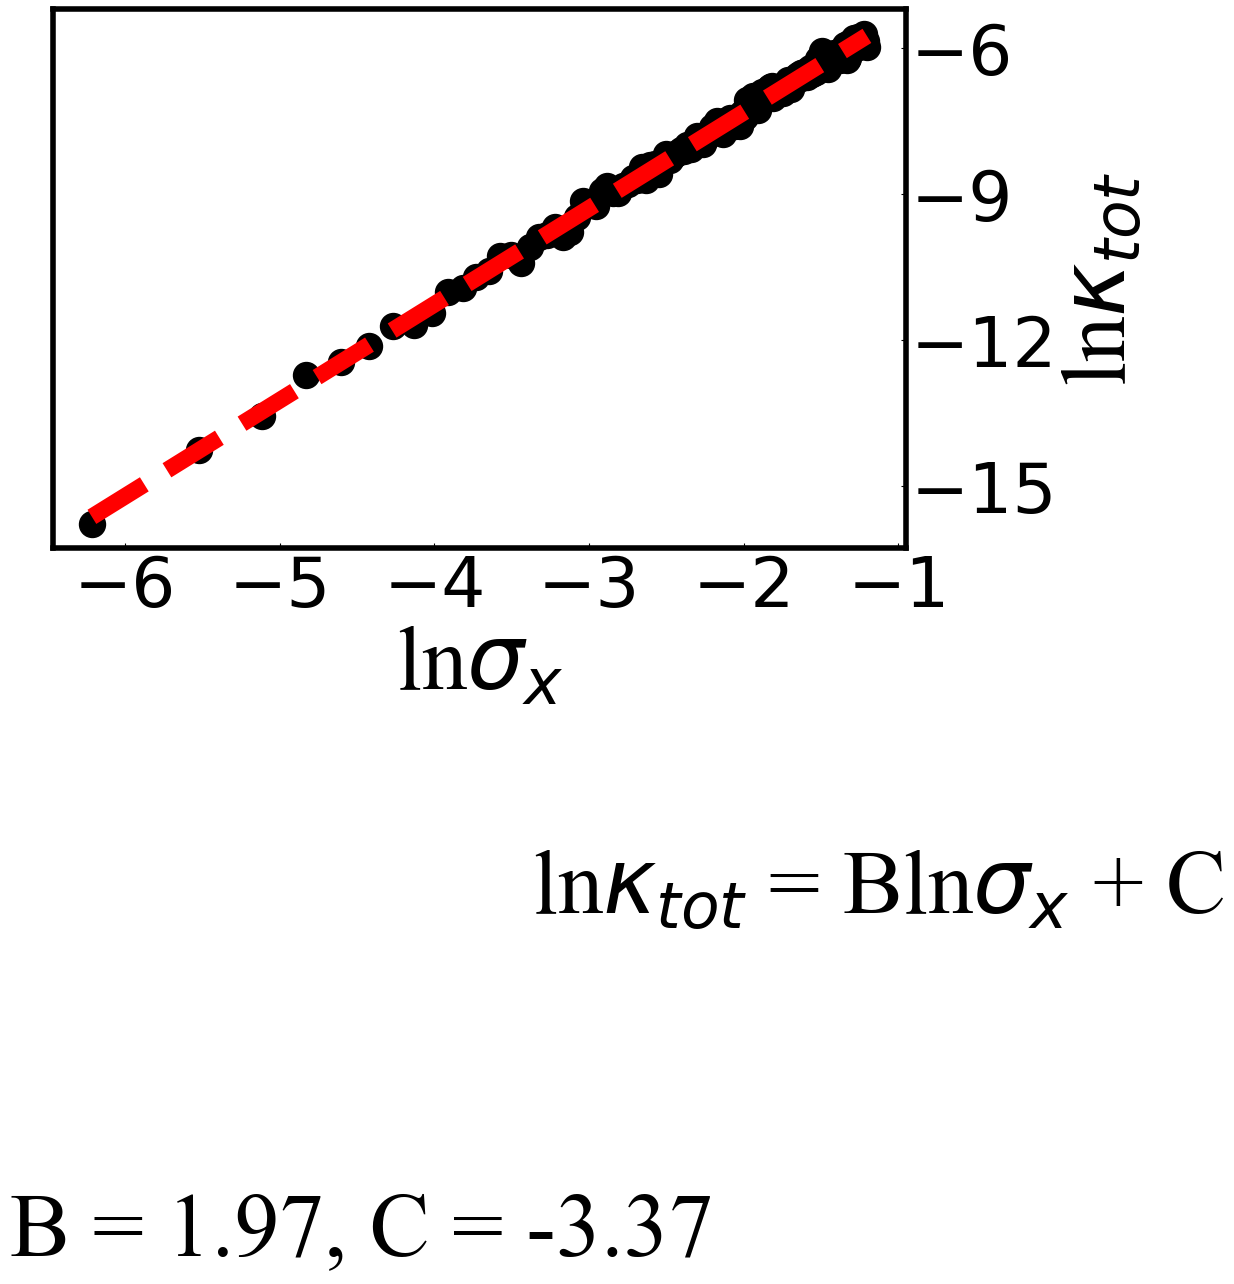

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.pyplot import MultipleLocator
from matplotlib.pyplot import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter

legs = 4

equal_0 = 'g'   
change = 't'

sizesizesize = 20
file_path = ''  
if legs == 3:
    file_path = 'Markovian_N3_total.CSV' if m_or_nm == 1 else 'non_Markovian_N3_total.CSV'
elif legs == 4:
    file_path = 'Braided_total.CSV'

dataframe = pd.read_csv(file_path)
print(file_path)

filtered_df = dataframe.loc[(dataframe[equal_0] == 0) & (dataframe[change] <= 0.3)]
sorted_df = filtered_df.sort_values(by=change)
c_values = sorted_df['col_value'].tolist()
column_change_sorted_values = sorted_df[change].tolist()

A = np.vander(column_change_sorted_values, 3)[:, :1]  
a, _, _, _ = np.linalg.lstsq(A, c_values, rcond=None)  
print(f"Fitted coefficient for x^2: {a[0]}") 
x_fit = np.linspace(min(column_change_sorted_values), max(column_change_sorted_values), 100)
y_fit = a[0] * x_fit**2
plt.figure(figsize=(6,5))
plt.scatter(column_change_sorted_values, c_values,  alpha=0.8,color='black')
plt.plot(x_fit, y_fit,  color='red',linewidth = 4, linestyle='--')
    
index_of_total = file_path.find('total')
result = file_path[:index_of_total].strip() 

if equal_0 == 'g':
    plt.ylim((-0.0003, 0.0047))
    plt.xlim((-0.02, 0.32))
    plt.xlabel('$\sigma_x$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize})
    plt.tick_params(labelsize = sizesizesize,direction = 'in')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(0.1))
    ax.yaxis.set_major_locator(MultipleLocator(0.001))
    ticks = ax.set_xticklabels([0.00,0, 0.1, 0.2,0.3])
    ticks = ax.set_yticklabels([0.00, 0, 0.00006, 0.00012, 0.00018])
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))
    ax.yaxis.set_major_formatter(formatter)
    function_label = r'$\kappa_{{tot}}$ = 3.49$\times 10^{-2}\sigma^2_{{x}}$'
    plt.text(0.21, 0.00002, function_label, fontsize=sizesizesize, ha='center')  
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)

if legs == 4:
    plt.ylabel(r'$\kappa_{tot}(\times 10^{-3})$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize})
else:
    plt.ylabel(r'$\kappa_{min}\thickspace (\times 10^{-4})$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize})

plt.show()

column_change_sorted_values = column_change_sorted_values[1:]
c_values = c_values[1:]
x = np.log(column_change_sorted_values)
y = np.log(c_values)
sizesizesize_2 = 50
if legs == 3 and m_or_nm == 2 and equal_0 == 't':
    x = x[-70:]
    y = y[-70:]
if legs == 4 or m_or_nm == 1 or change == 'g':
    coefficients = np.polyfit(x, y, 1)  
    a, b = coefficients  
    y_fit = a * x + b  
    plt.figure(figsize=(11,7))
    plt.scatter(x, y,s = 350,color='black', alpha=1,label='Data Points')  
    plt.plot(x, y_fit, color='red', linewidth = 12, linestyle="--",label=f'Fit Line')  

    yticks = plt.gca().get_yticks() 
    if len(yticks) > 1:  
        tick_diff = yticks[1] - yticks[0]
    else:
        tick_diff = 0  

    plt.ylabel('ln$\kappa_{tot}$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize_2*1.3})    
    if equal_0 == 'g':
        plt.xlabel('ln$\sigma_{{x}}$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize_2*1.3})
        equation = f'ln$\kappa_{{tot}}$ = {a:.2f}ln$\sigma_{{x}}$ {b:.2f}'  
        # text = r'$\rm{k} = 1.94$'
        plt.tick_params(labelsize = sizesizesize_2,direction = 'in')
        ax = plt.gca()
        ax.yaxis.set_major_locator(MultipleLocator(3))
        ax.xaxis.set_major_locator(MultipleLocator(1))
        equation_3 = f'ln$\kappa_{{tot}}$ = Bln$\sigma_{{x}}$ + C'  
        plt.text((np.min(x) + np.max(x)) / 2.2, min(y)-8, equation_3, fontdict={'family' : 'Times New Roman', 'size':sizesizesize_2*1.3}, color='black')
        equation_4 = f'B = 1.97, C = -3.37 '  
        plt.text((np.min(x) + np.max(x)) / 1.1, min(y)-15, equation_4, fontdict={'family' : 'Times New Roman', 'size':sizesizesize_2*1.3}, color='black')
        ax.spines['top'].set_linewidth(4)
        ax.spines['bottom'].set_linewidth(4)
        ax.spines['right'].set_linewidth(4)
        ax.spines['left'].set_linewidth(4)
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
plt.show()


Code for Figure.6(d) of paper

Braided_total.CSV
Fitted coefficient for x^2: 0.015208088803651812


C:\Users\23109\AppData\Local\Temp\ipykernel_1980\4223049811.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_xticklabels([0.00,0, 0.1, 0.2,0.3])
C:\Users\23109\AppData\Local\Temp\ipykernel_1980\4223049811.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_yticklabels([0.00, 0, 0.00006, 0.00012, 0.00018])


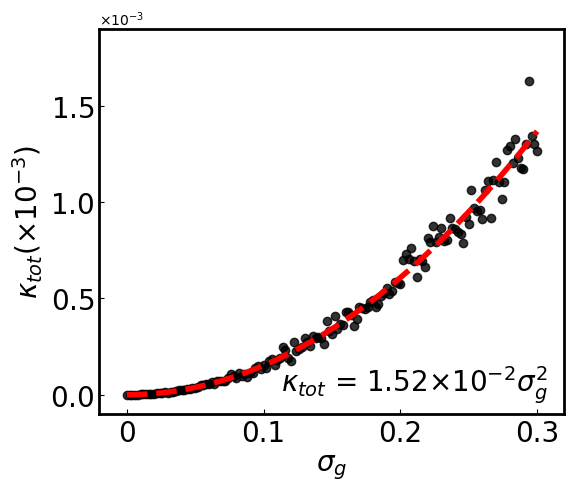

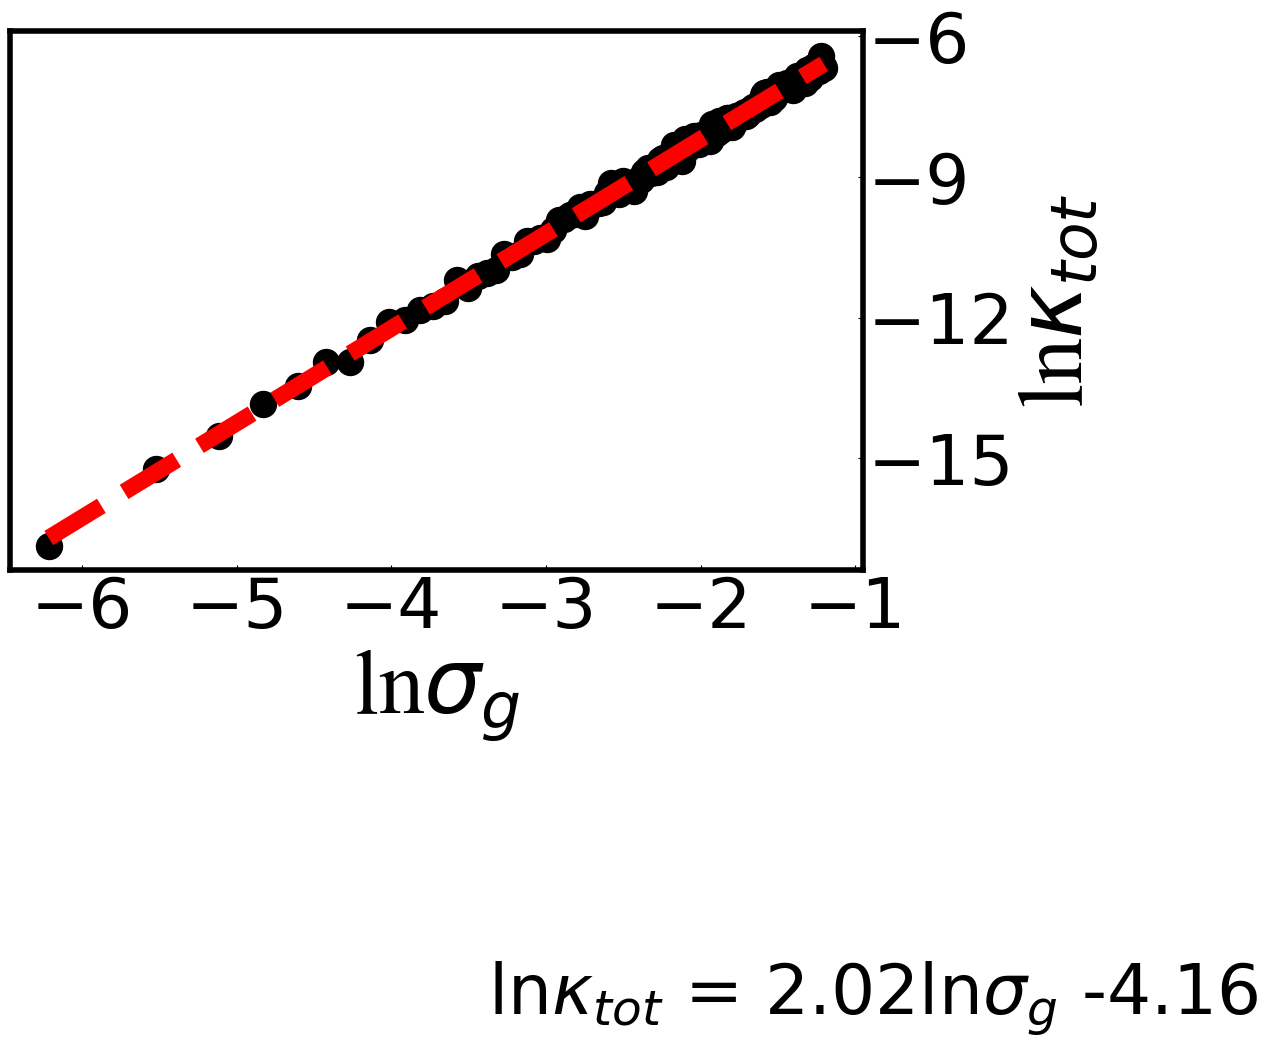

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.pyplot import MultipleLocator
from matplotlib.pyplot import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter

legs = 4

equal_0 = 't'   # Define the series names here to avoid hardcoding in multiple places
change = 'g'

sizesizesize = 20
file_path = ''  # Determine the file path based on user inputs
if legs == 3:
    file_path = 'Markovian_N3_total.CSV' if m_or_nm == 1 else 'non_Markovian_N3_total.CSV'
elif legs == 4:
    file_path = 'Braided_total.CSV'

dataframe = pd.read_csv(file_path)
print(file_path)

filtered_df = dataframe.loc[(dataframe[equal_0] == 0) & (dataframe[change] <= 0.3)]
sorted_df = filtered_df.sort_values(by=change)
c_values = sorted_df['col_value'].tolist()
column_change_sorted_values = sorted_df[change].tolist()

A = np.vander(column_change_sorted_values, 3)[:, :1]  
a, _, _, _ = np.linalg.lstsq(A, c_values, rcond=None)  
print(f"Fitted coefficient for x^2: {a[0]}") 
x_fit = np.linspace(min(column_change_sorted_values), max(column_change_sorted_values), 100)
y_fit = a[0] * x_fit**2
plt.figure(figsize=(6,5))
plt.scatter(column_change_sorted_values, c_values,  alpha=0.8,color='black')
plt.plot(x_fit, y_fit,  color='red',linewidth = 4, linestyle='--')

index_of_total = file_path.find('total')
result = file_path[:index_of_total].strip() 


if equal_0 == 't':
    plt.ylim((-0.0001, 0.0019))
    plt.xlim((-0.02, 0.32))
    plt.xlabel('$\sigma_g$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize})
    plt.tick_params(labelsize = sizesizesize,direction = 'in')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(0.1))
    ax.yaxis.set_major_locator(MultipleLocator(0.0005))
    ticks = ax.set_xticklabels([0.00,0, 0.1, 0.2,0.3])
    ticks = ax.set_yticklabels([0.00, 0, 0.00006, 0.00012, 0.00018])
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))
    ax.yaxis.set_major_formatter(formatter)
    function_label = r'$\kappa_{{tot}}$ = 1.52$\times 10^{-2}\sigma^2_{{g}}$'
    plt.text(0.21, 0.00002, function_label, fontsize=sizesizesize, ha='center')  
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)

if legs == 4:
    plt.ylabel(r'$\kappa_{tot}(\times 10^{-3})$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize})
else:
    plt.ylabel(r'$\kappa_{min}\thickspace (\times 10^{-4})$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize})
plt.show()

column_change_sorted_values = column_change_sorted_values[1:]
c_values = c_values[1:]
x = np.log(column_change_sorted_values)
y = np.log(c_values)
sizesizesize_2 = 50
if legs == 3 and m_or_nm == 2 and equal_0 == 't':
    x = x[-70:]
    y = y[-70:]
if legs == 4 or m_or_nm == 1 or change == 'g':
    coefficients = np.polyfit(x, y, 1)  
    a, b = coefficients  
    y_fit = a * x + b  
    plt.figure(figsize=(11,7))
    plt.scatter(x, y,s = 350,color='black', alpha=1,label='Data Points') 
    plt.plot(x, y_fit, color='red', linewidth = 12, linestyle="--",label=f'Fit Line')  
    yticks = plt.gca().get_yticks()  
    if len(yticks) > 1:  
        tick_diff = yticks[1] - yticks[0]
    else:
        tick_diff = 0  
    
    plt.ylabel('ln$\kappa_{tot}$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize_2*1.3})    
    if equal_0 == 't':
        plt.xlabel('ln$\sigma_{{g}}$',fontdict={'family' : 'Times New Roman', 'size':sizesizesize_2*1.3})
        equation = f'ln$\kappa_{{tot}}$ = {a:.2f}ln$\sigma_{{g}}$ {b:.2f}' 
        plt.tick_params(labelsize = sizesizesize_2,direction = 'in')
        ax = plt.gca()
        ax.yaxis.set_major_locator(MultipleLocator(3))
        ax.xaxis.set_major_locator(MultipleLocator(1))
        plt.text((np.min(x) + np.max(x)) / 2.2, min(y)-10, equation, fontsize=sizesizesize_2, color='black')
        ax.spines['top'].set_linewidth(4)
        ax.spines['bottom'].set_linewidth(4)
        ax.spines['right'].set_linewidth(4)
        ax.spines['left'].set_linewidth(4)
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
plt.show()
